In [5]:
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'

# Customizing appearance
In the previous parts, you learned how Matplotlib organizes plot-making by figures and axes. We broke down the components of a basic figure and learned how to create them. You also learned how to add one or more axes to a figure, and how to tie them together. You even learned how to change some of the basic appearances of the axes. Finally, we went over some of the many plotting methods that Matplotlib has to draw on those axes. With all that knowledge, you should be off making great and wonderful figures.

Why are you still here?

"We don't know how to control our plots and figures!" says some random voice in the back of the room.

Of course! While the previous sections may have taught you some of the structure and syntax of Matplotlib, it did not describe much of the substance and vocabulary of the library. This section will go over many of the properties that are used throughout the library. Note that while many of the examples in this section may show one way of setting a particular property, that property may be applicable elsewhere in completely different context.

# Colors
Given that Matplotlib is a plotting library, colors are associated with everything that is plotted in your figures. Matplotlib supports a [very robust language](https://matplotlib.org/stable/api/colors_api.html) for specifying colors that should be familiar to a wide variety of users.

### Colornames
First, colors can be given as strings. For very basic colors, you can even get away with just a single letter:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

Other colornames that are allowed are the HTML/CSS colornames such as "burlywood" and "chartreuse". See the [full list](https://www.w3schools.com/tags/ref_colornames.asp) of the 147 colornames. We allow "grey" where-ever "gray" appears in that list of colornames. All of these colornames are case-insensitive.

### Hex values
Colors can also be specified by supplying a HTML/CSS hex string, such as `'#0000FF'` for blue. Support for an optional alpha channel was added for v2.0.

### 256 Shades of Gray
A gray level can be given instead of a color by passing a string representation of a number between 0 and 1, inclusive. `'0.0'` is black, while `'1.0'` is white. `'0.75'` would be a light shade of gray.

### RGB[A] tuples
You may come upon instances where the previous ways of specifying colors do not work. This can sometimes happen in some of the deeper, stranger levels of the library. When all else fails, the universal language of colors for matplotlib is the RGB[A] tuple. This is the "Red", "Green", "Blue", and sometimes "Alpha" tuple of floats in the range of [0, 1]. One means full saturation of that channel, so a red RGBA tuple would be `(1.0, 0.0, 0.0, 1.0)`, whereas a partly transparent green RGBA tuple would be `(0.0, 1.0, 0.0, 0.75)`.  The documentation will usually specify whether it accepts RGB or RGBA tuples. Sometimes, a list of tuples would be required for multiple colors, and you can even supply a Nx3 or Nx4 numpy array in such cases.

In functions such as `plot()` and `scatter()`, while it may appear that they can take a color specification, what they really need is a "format specification", which includes color as part of the format. Unfortunately, such specifications are string only and so RGB[A] tuples are not supported for such arguments (but you can still pass an RGB[A] tuple for a "color" argument).

Oftentimes there is a separate argument for "alpha" where-ever you can specify a color. The value for "alpha" will usually take precedence over the alpha value in the RGBA tuple. There is no easy way around this inconsistency.

### Cycle references
With the advent of fancier color cycles coming from the many available styles, users needed a way to reference those colors in the style without explicitly knowing what they are. So, in v2.0, the ability to reference the first 10 iterations of the color cycle was added. Whereever one could specify a color, you can supply a 2 character string of 'C#'. So, 'C0' would be the first color, 'C1' would be the second, and so on and so forth up to 'C9'.

# Colormaps
Another very important property of many figures is the colormap. The job of a colormap is to relate a scalar value to a color. In addition to the regular portion of the colormap, an "over", "under" and "bad" color can be optionally defined as well. NaNs will trigger the "bad" part of the colormap.

As we all know, we create figures in order to convey information visually to our readers. There is much care and consideration that have gone into the design of these colormaps. Your choice in which colormap to use depends on what you are displaying. In mpl, the "jet" colormap has historically been used by default, but it will often not be the colormap you would want to use. Much discussion has taken place on the mailing lists with regards to what colormap should be default. The v2.0 release of Matplotlib adopted a new default colormap, 'viridis', along with some other stylistic changes to the defaults.

I want to acknowedge Nicolas Rougier and Tony Yu for putting significant effort in educating users in proper colormap selections. Furthermore, thanks goes to Nathaniel Smith and Stéfan van der Walt for developing the new perceptually uniform colormaps such as viridis. [Here is the talk](https://www.youtube.com/watch?v=xAoljeRJ3lU) they gave at SciPy 2015 that does an excelent job explaining colormaps.

Here is the full gallery of all the pre-defined colormaps, organized by the types of data they are usually used for.

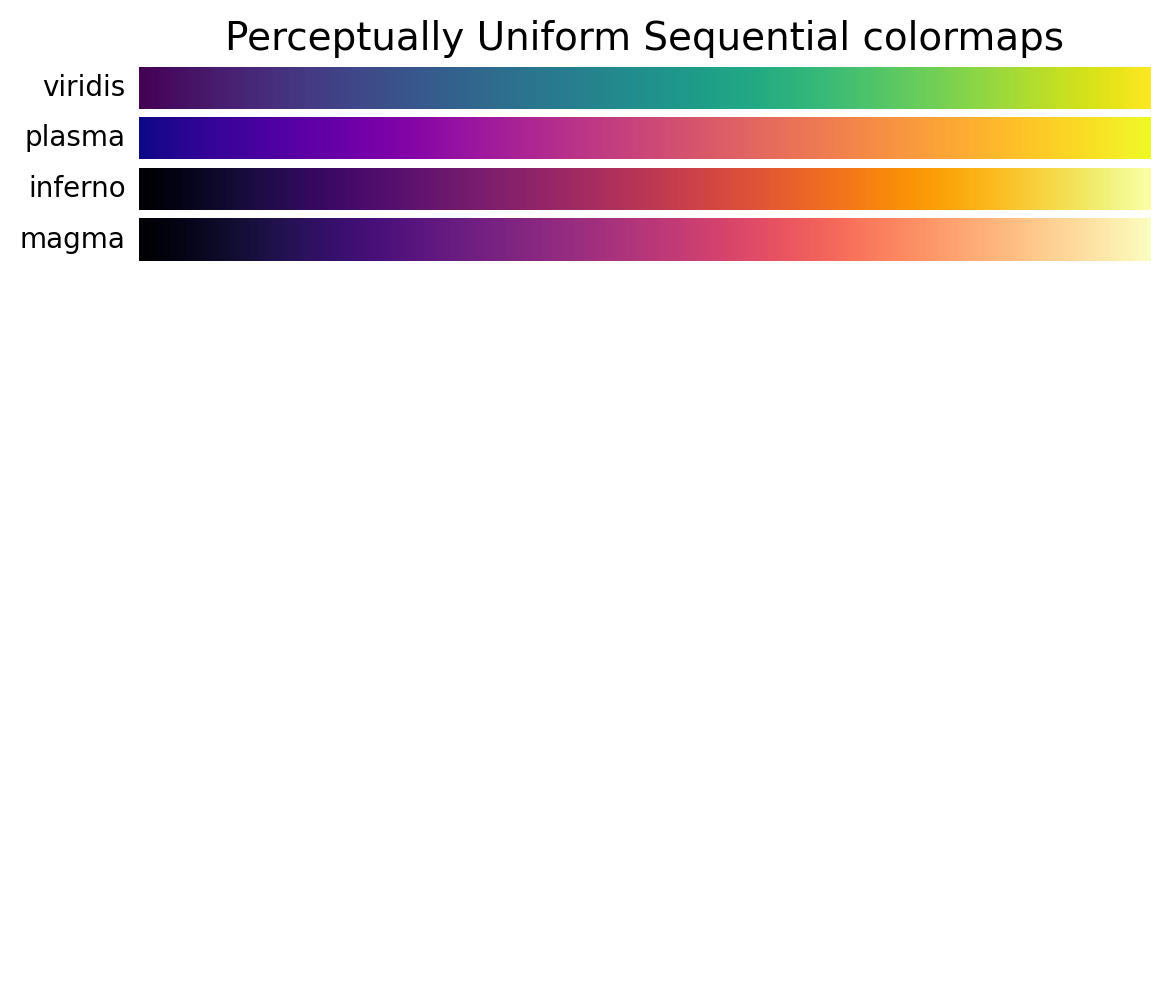

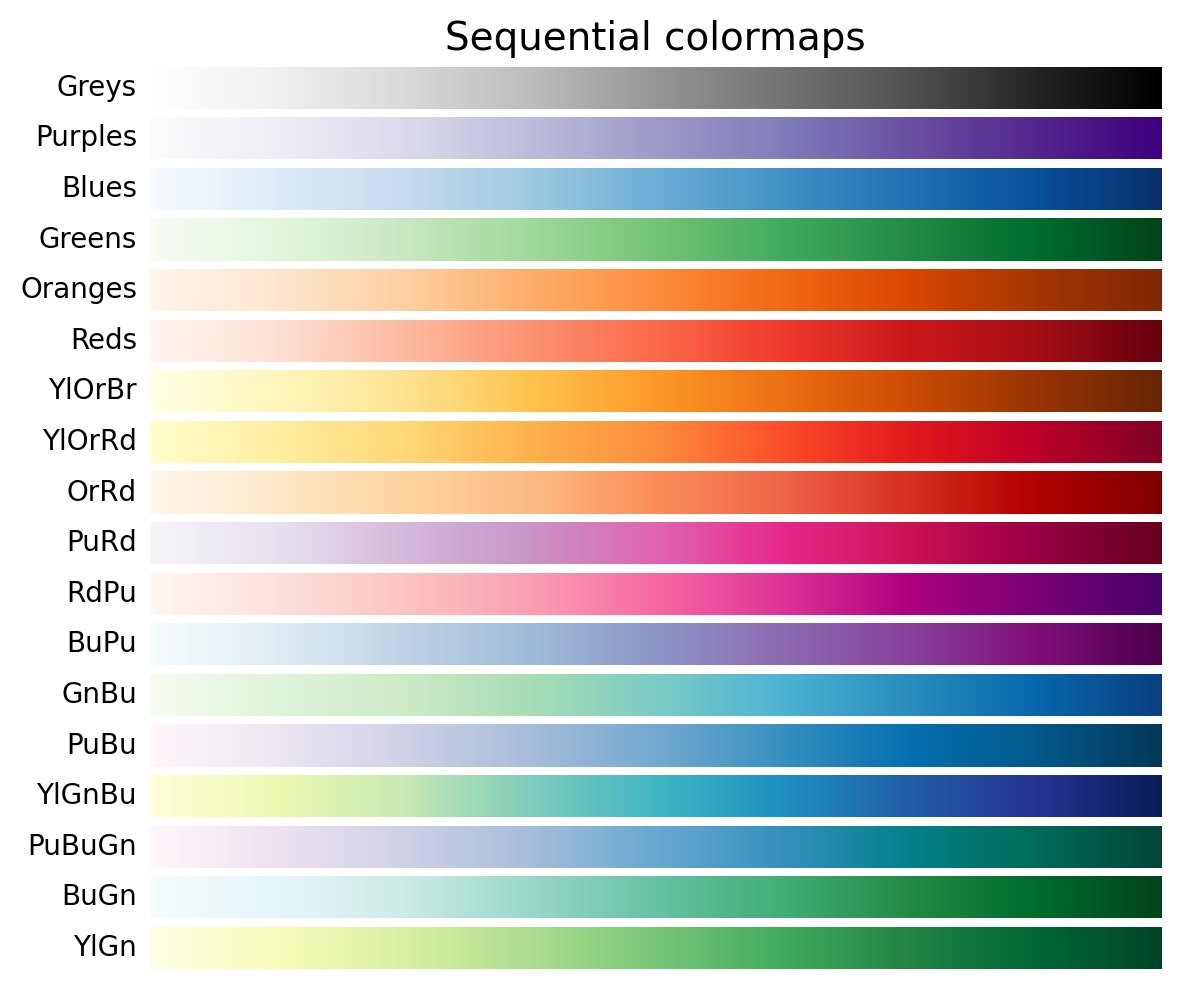

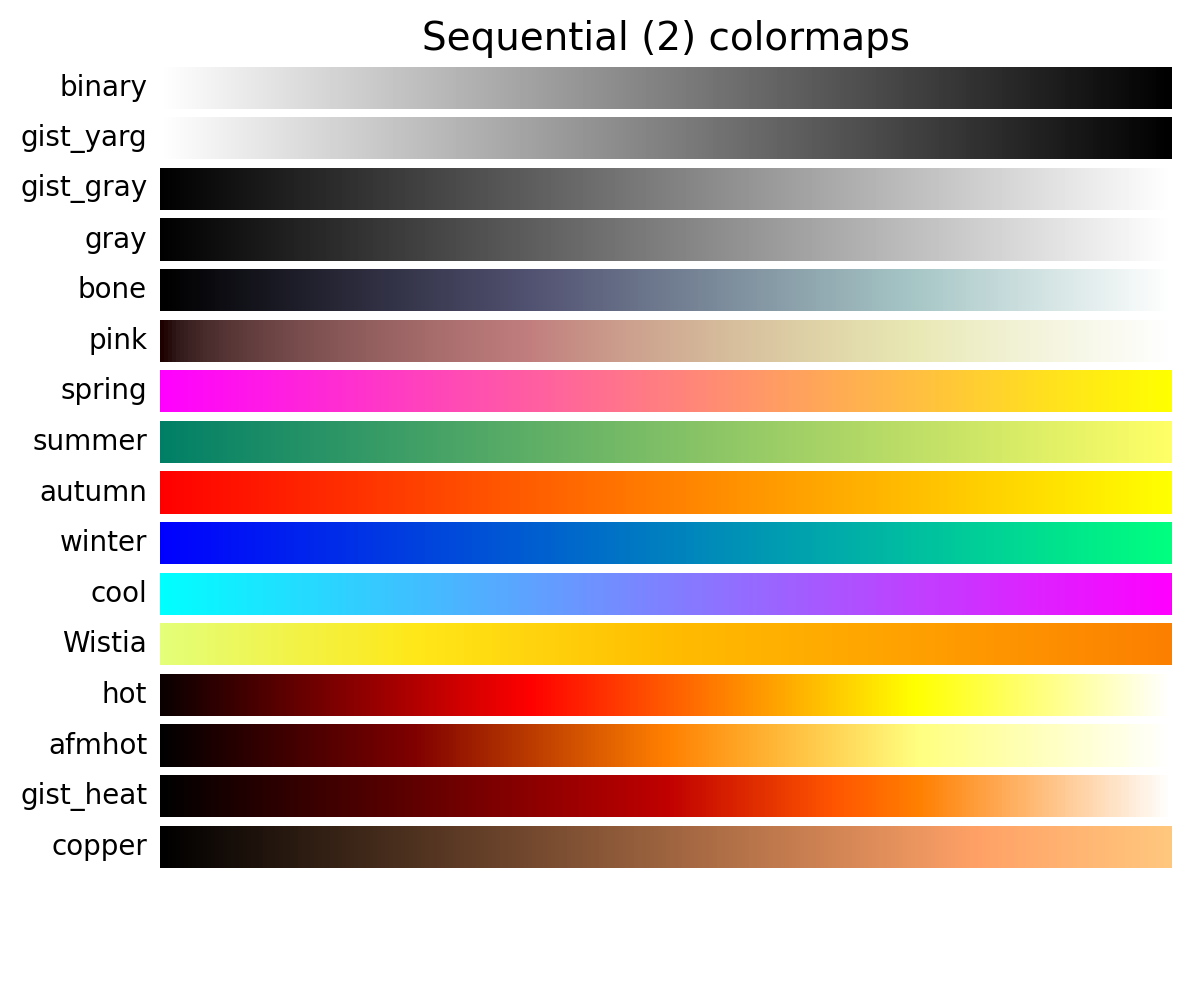

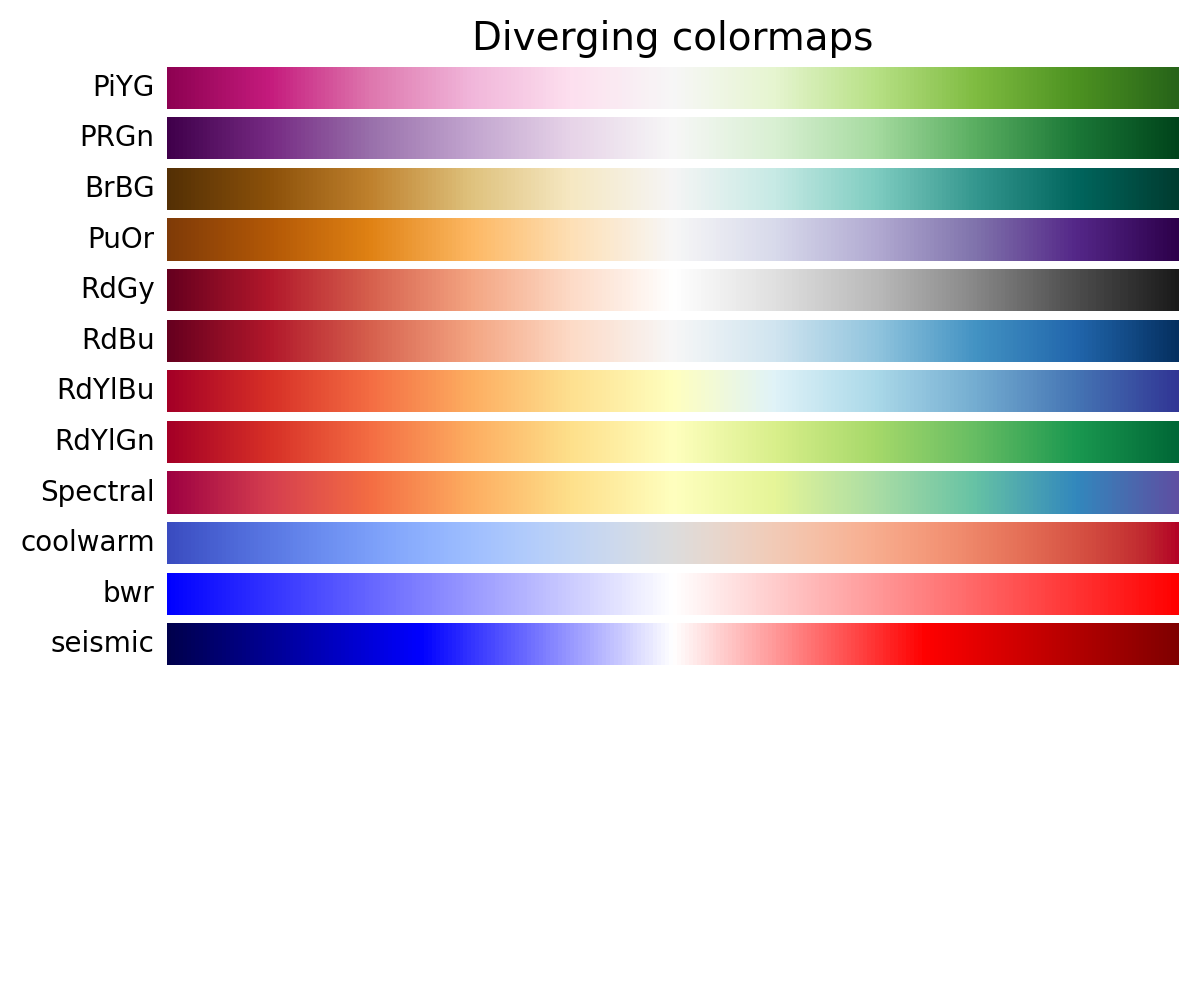

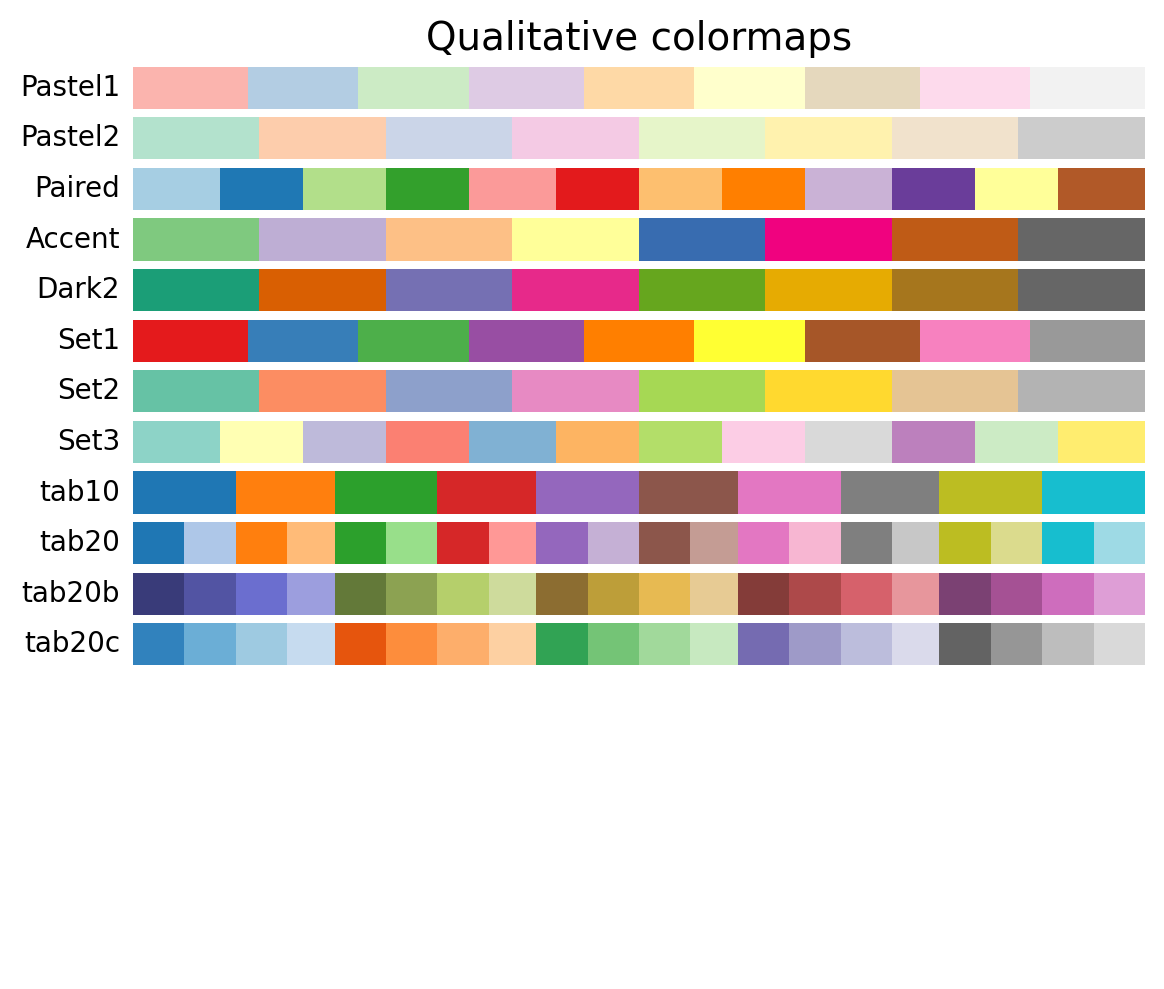

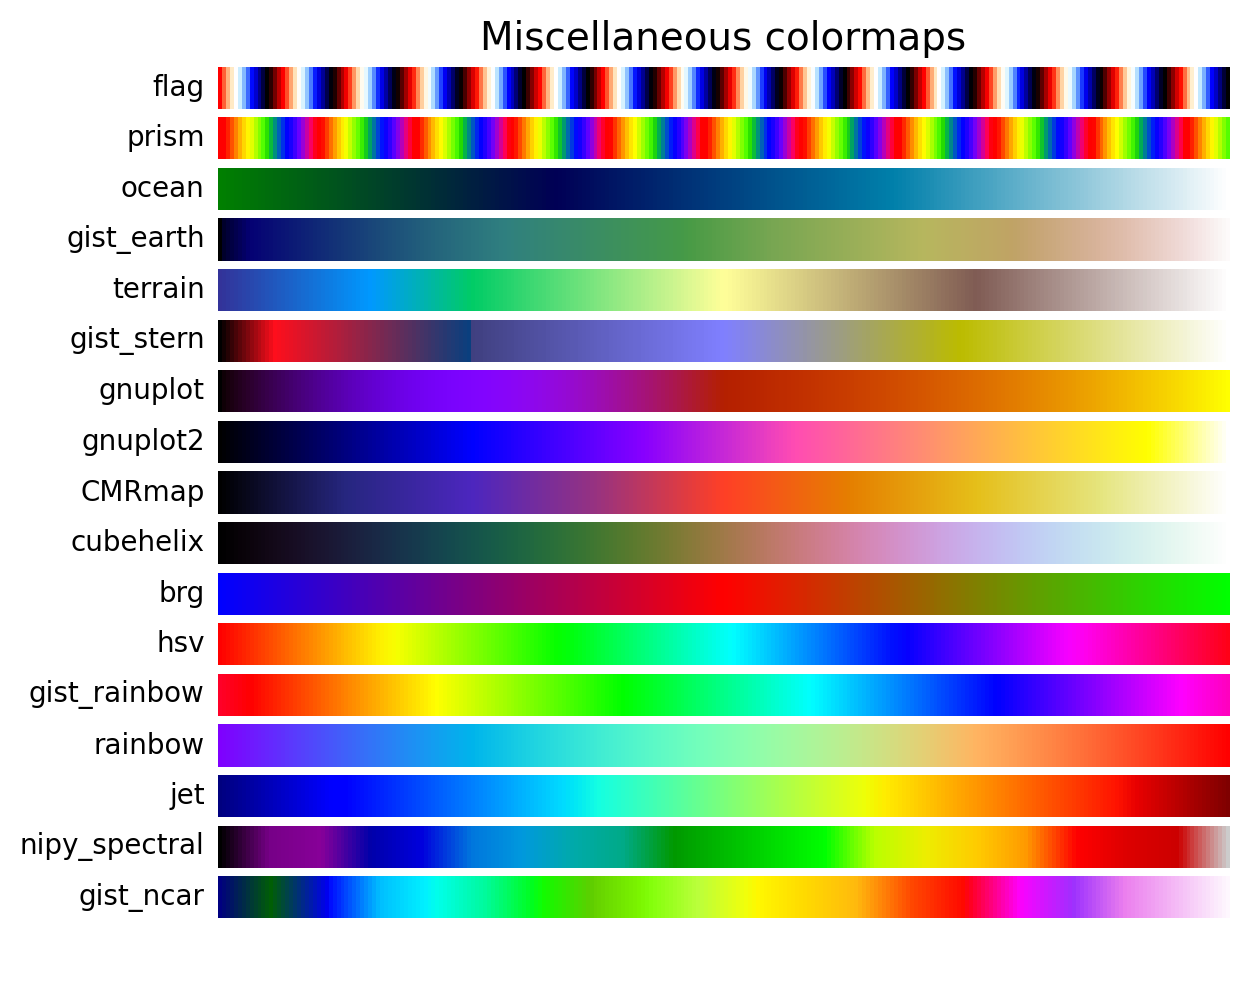

In [6]:
# %load http://matplotlib.org/mpl_examples/color/colormaps_reference.py
"""
==================
Colormap reference
==================

Reference for colormaps included with Matplotlib.

This reference example shows all colormaps included with Matplotlib. Note that
any colormap listed here can be reversed by appending "_r" (e.g., "pink_r").
These colormaps are divided into the following categories:

Sequential:
    These colormaps are approximately monochromatic colormaps varying smoothly
    between two color tones---usually from low saturation (e.g. white) to high
    saturation (e.g. a bright blue). Sequential colormaps are ideal for
    representing most scientific data since they show a clear progression from
    low-to-high values.

Diverging:
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).

Qualitative:
    These colormaps vary rapidly in color. Qualitative colormaps are useful for
    choosing a set of discrete colors. For example::

        color_list = plt.cm.Set3(np.linspace(0, 1, 12))

    gives a list of RGB colors that are good for plotting a series of lines on
    a dark background.

Miscellaneous:
    Colormaps that don't fit into the categories above.

"""


# Have colormaps separated into categories:
# http://matplotlib.org/examples/color/colormaps_reference.html
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)

Grayscale conversion
====================

It is important to pay attention to conversion to grayscale for color
plots, since they may be printed on black and white printers.  If not
carefully considered, your readers may end up with indecipherable
plots because the grayscale changes unpredictably through the
colormap.

Conversion to grayscale is done in many different ways ([bw](http://www.tannerhelland.com/3643/grayscale-image-algorithm-vb6/)). Some of the better
ones use a linear combination of the rgb values of a pixel, but weighted
according to how we perceive color intensity. A nonlinear method of conversion
to grayscale is to use the $L^*$ (lightness) values of the pixels. In general, similar
principles apply for this question as they do for presenting one's information
perceptually; that is, if a colormap is chosen that is monotonically increasing
in $L^*$ values, it will print in a reasonable manner to grayscale.

With this in mind, we see that the Sequential colormaps have reasonable
representations in grayscale. Some of the Sequential2 colormaps have decent
enough grayscale representations, though some (autumn, spring, summer, winter)
have very little grayscale change. If a colormap like this was used in a plot
and then the plot was printed to grayscale, a lot of the information may map to
the same gray values. The Diverging colormaps mostly vary from darker gray on
the outer edges to white in the middle. Some (PuOr and seismic) have noticably
darker gray on one side than the other and therefore are not very symmetric.
coolwarm has little range of gray scale and would print to a more uniform plot,
losing a lot of detail. Note that overlaid, labeled contours could help
differentiate between one side of the colormap vs. the other since color cannot
be used once a plot is printed to grayscale. Many of the Qualitative and
Miscellaneous colormaps, such as Accent, hsv, and jet, change from darker to
lighter and back to darker gray throughout the colormap. This would make it
impossible for a viewer to interpret the information in a plot once it is
printed in grayscale.



Note that you need to install the Python package **colorspacious** to run the example

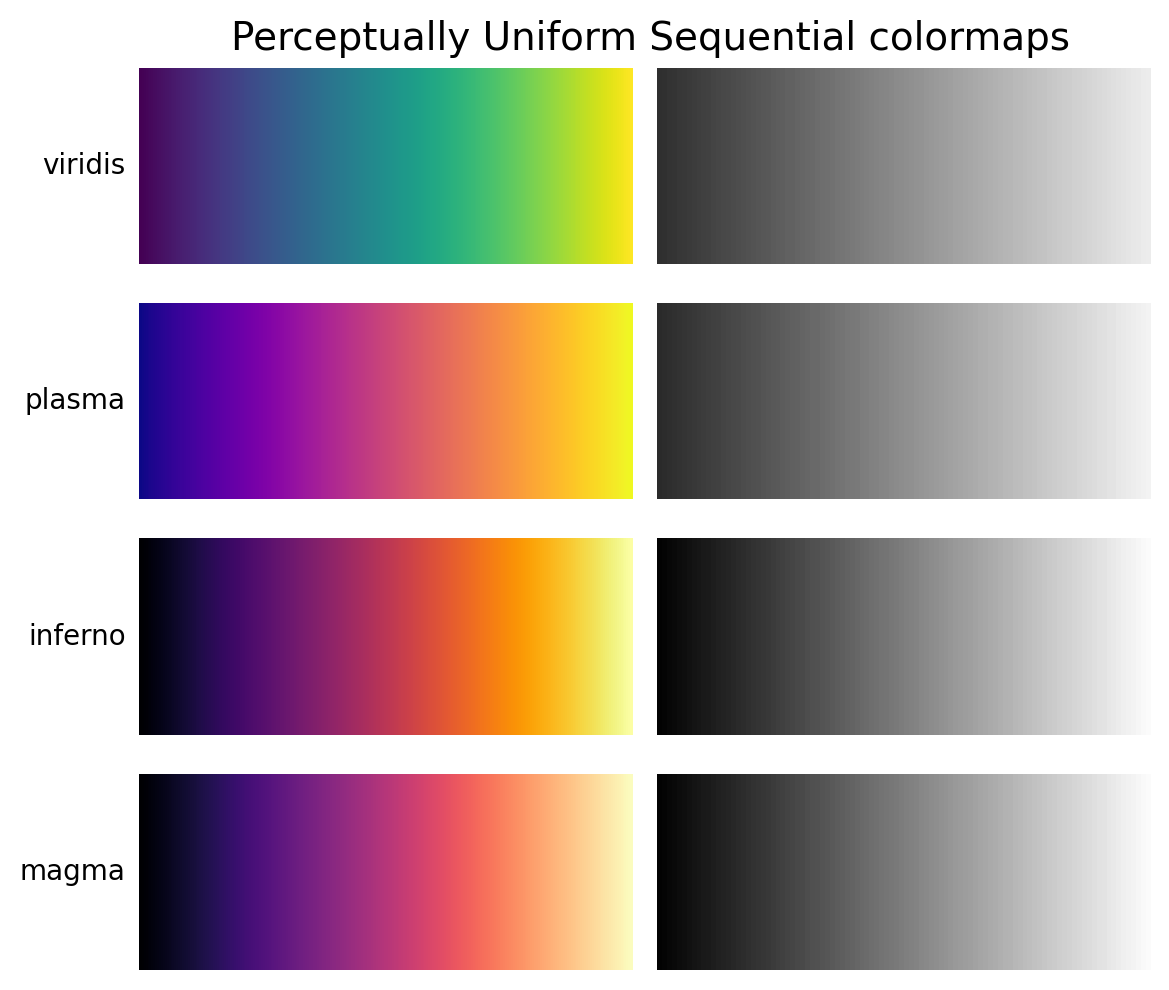

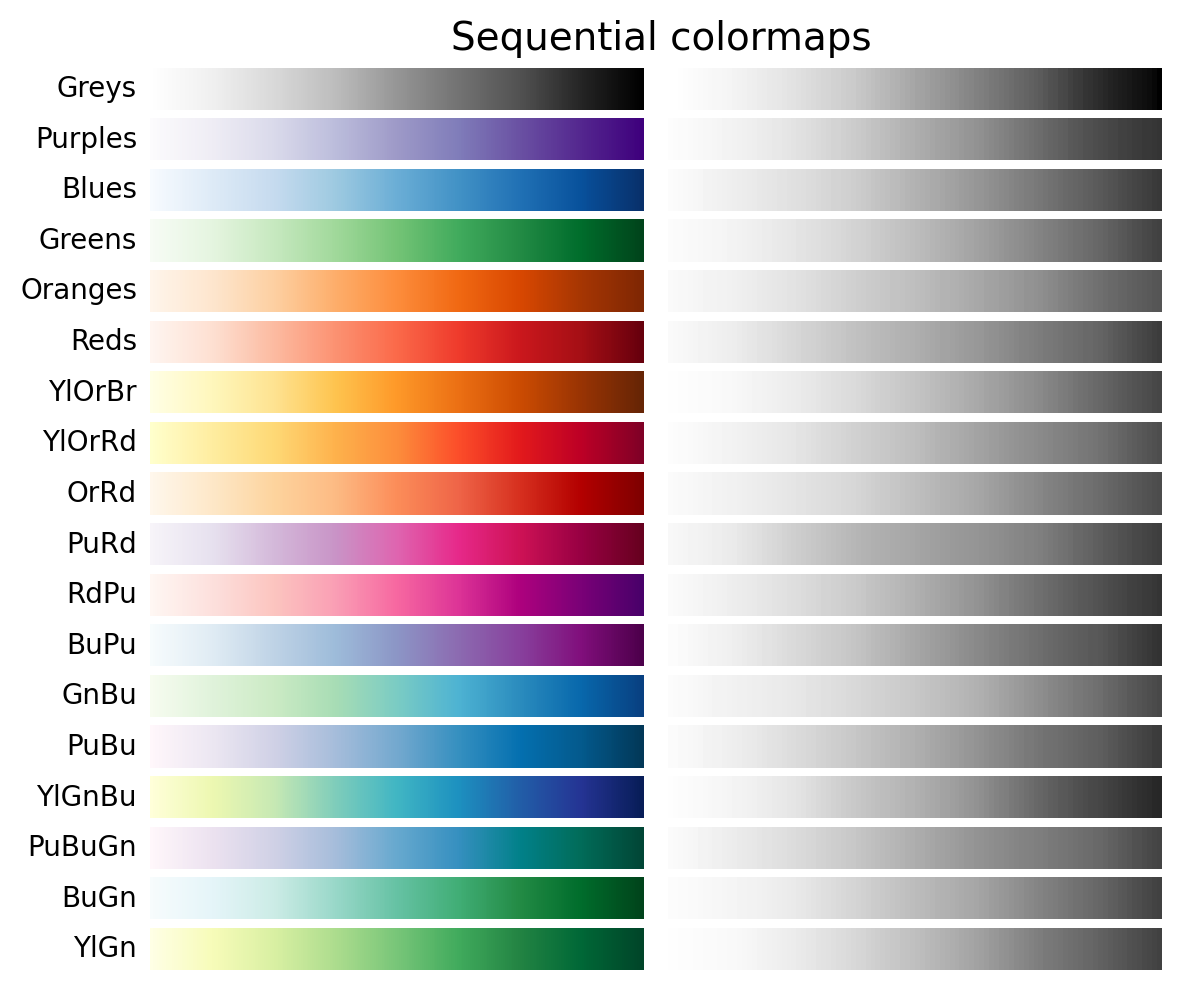

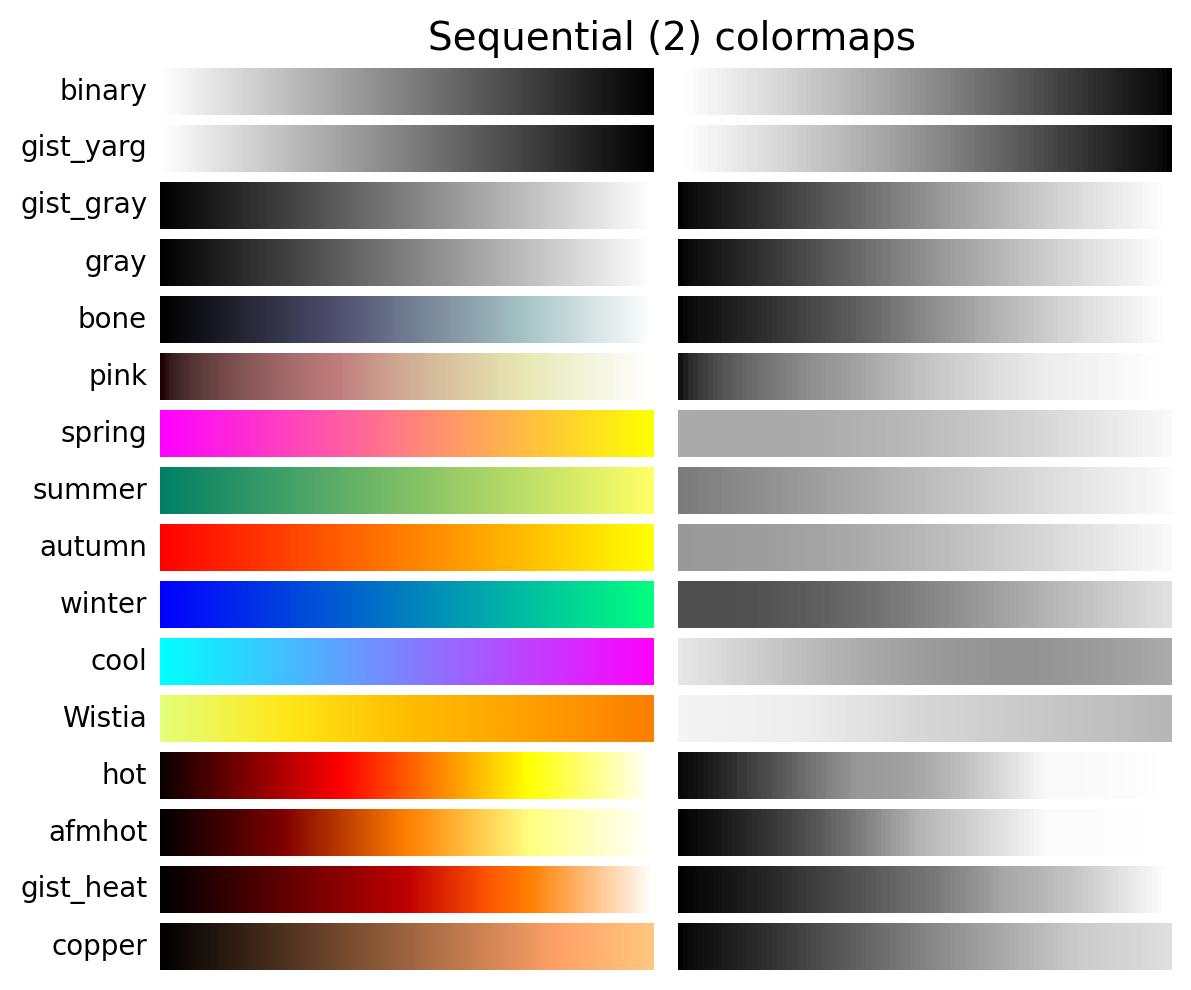

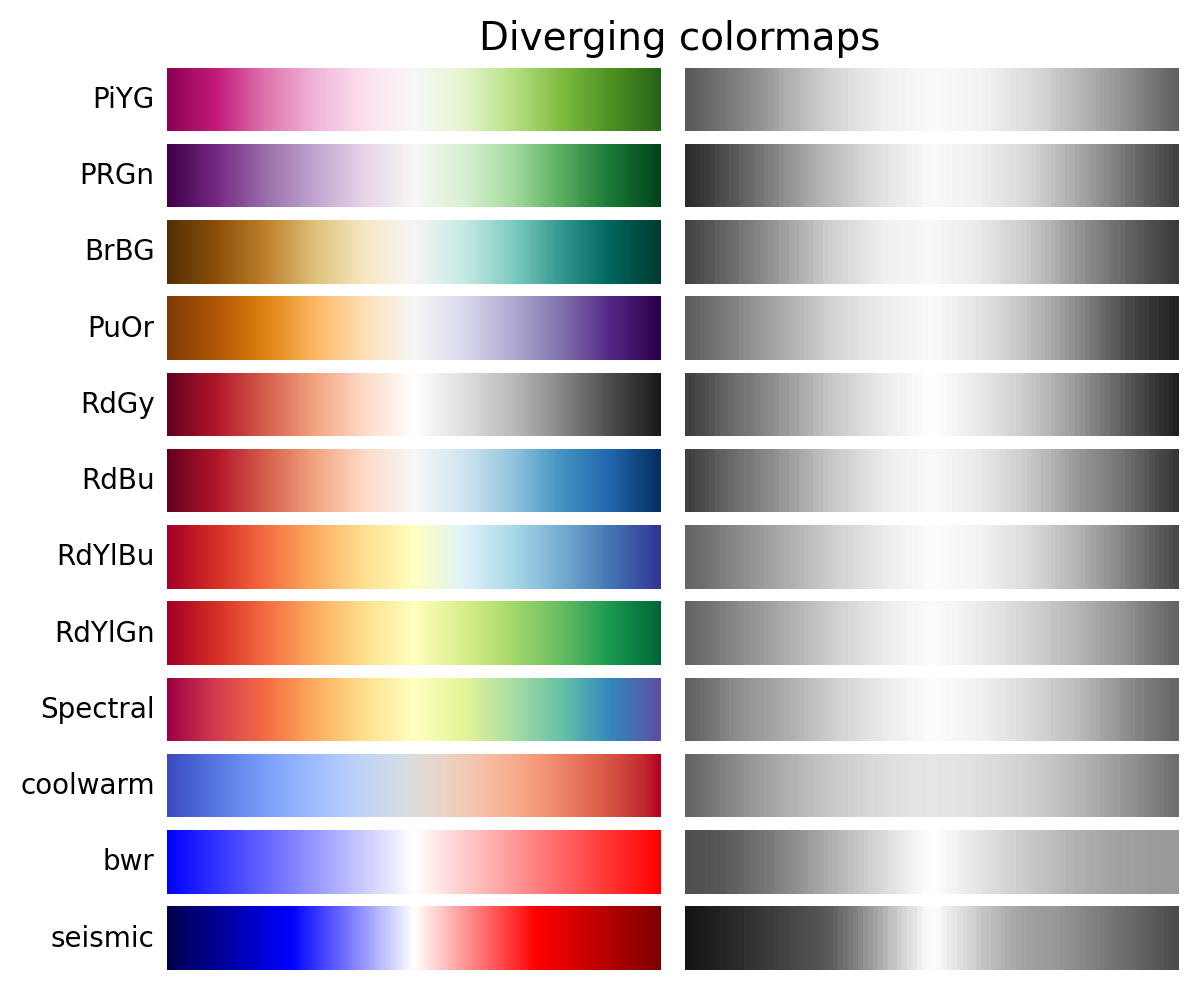

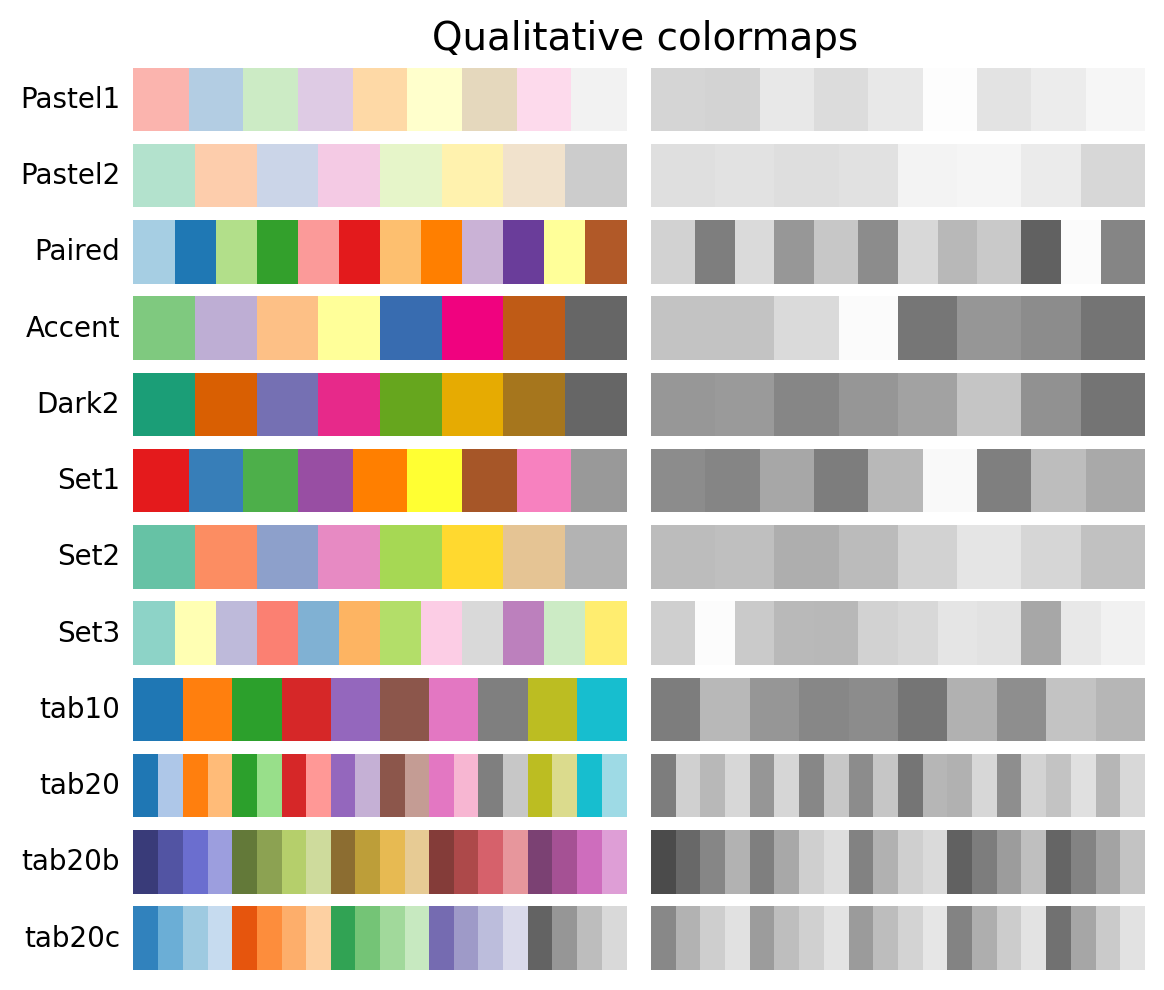

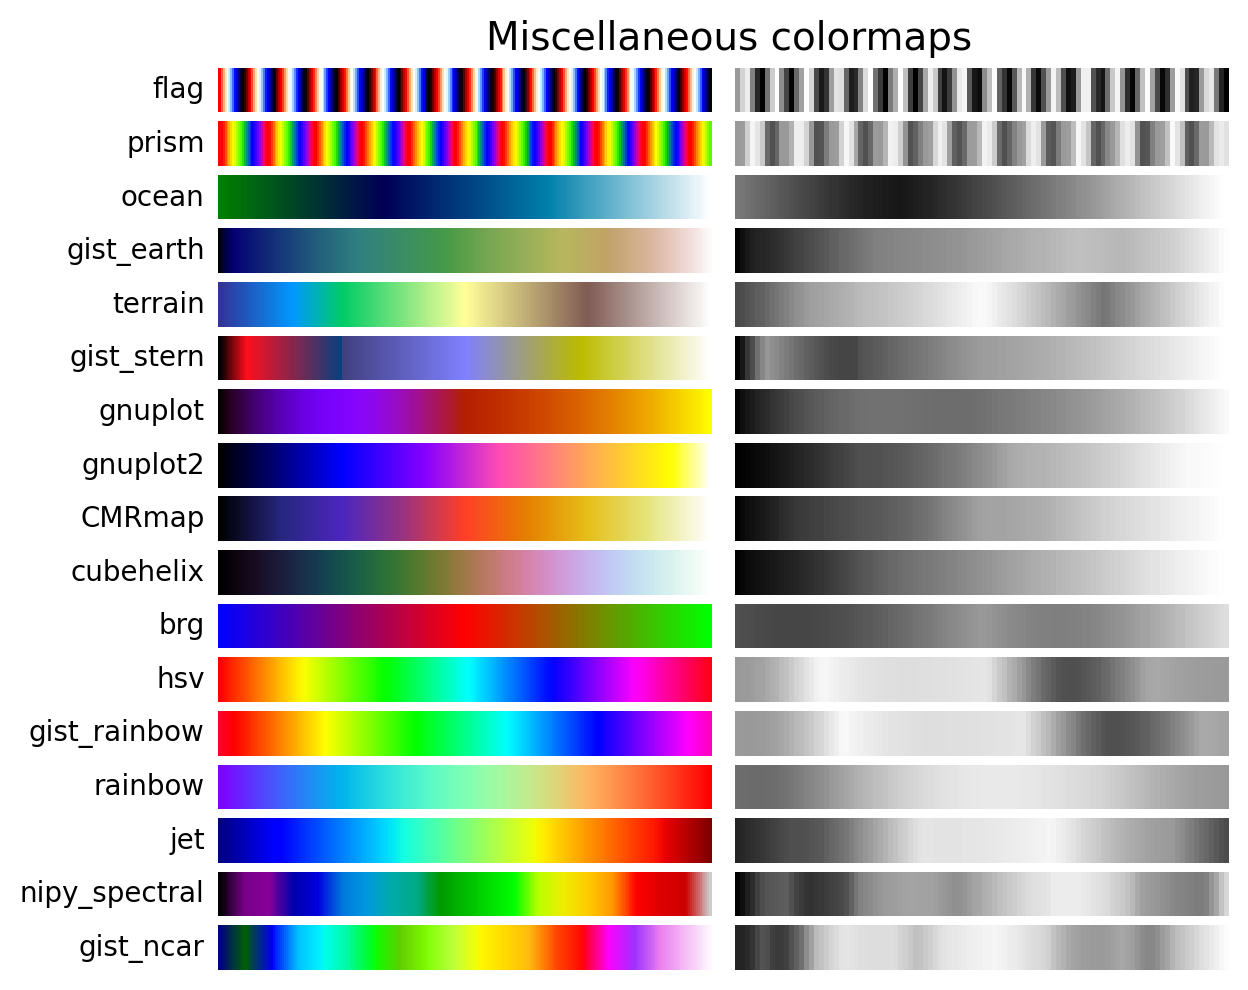

In [7]:
from colorspacious import cspace_converter

# Indices to step through colormap.
x = np.linspace(0.0, 1.0, 100)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    fig, axes = plt.subplots(nrows=len(cmap_list), ncols=2)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99,
                        wspace=0.05)
    fig.suptitle(cmap_category + ' colormaps', fontsize=14, y=1.0, x=0.6)

    for ax, name in zip(axes, cmap_list):

        # Get RGB values for colormap.
        rgb = plt.colormaps.get_cmap(name)(x)[np.newaxis, :, :3]

        # Get colormap in CAM02-UCS colorspace. We want the lightness.
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        L = lab[0, :, 0]
        L = np.float32(np.vstack((L, L, L)))

        ax[0].imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax[1].imshow(L, aspect='auto', cmap='binary_r', vmin=0., vmax=100.)
        pos = list(ax[0].get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes.flat:
        ax.set_axis_off()

for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

Color vision deficiencies
=========================

There is a lot of information available about color blindness (*e.g.*,
[colorblindness](http://www.color-blindness.com/)). Additionally, there are tools available to convert images to
how they look for different types of color vision deficiencies (*e.g.*,
[vischeck](http://www.vischeck.com/vischeck/)).

The most common form of color vision deficiency involves differentiating between
red and green. Thus, avoiding colormaps with both red and green will avoid many
problems in general.

# Markers
[Markers](http://matplotlib.org/api/markers_api.html) are commonly used in [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [`scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) plots, but also show up elsewhere. There is a wide set of markers available, and custom markers can even be specified.

marker     |  description  |marker    |  description  |marker    |  description  |marker    |  description  
-----------|---------------|----------|---------------|----------|---------------|:---------|:--------------
"."        |  point        |"+"       |  plus         |","       |  pixel        |"x"       |  cross
"o"        |  circle       |"D"       |  diamond      |"d"       |  thin_diamond |          |
"8"        |  octagon      |"s"       |  square       |"p"       |  pentagon     |"\*"      |  star
"&#124;"   |  vertical line|"\_"      | horizontal line |"h"     |  hexagon1     |"H"       |  hexagon2
0          |  tickleft     |4         |  caretleft    |"<"       | triangle_left |"3"       |  tri_left
1          |  tickright    |5         |  caretright   |">"       | triangle_right|"4"       |  tri_right
2          |  tickup       |6         |  caretup      |"^"       | triangle_up   |"2"       |  tri_up
3          |  tickdown     |7         |  caretdown    |"v"       | triangle_down |"1"       |  tri_down
"None"     |  nothing      |`None`    |  nothing      |" "       |  nothing      |""        |  nothing

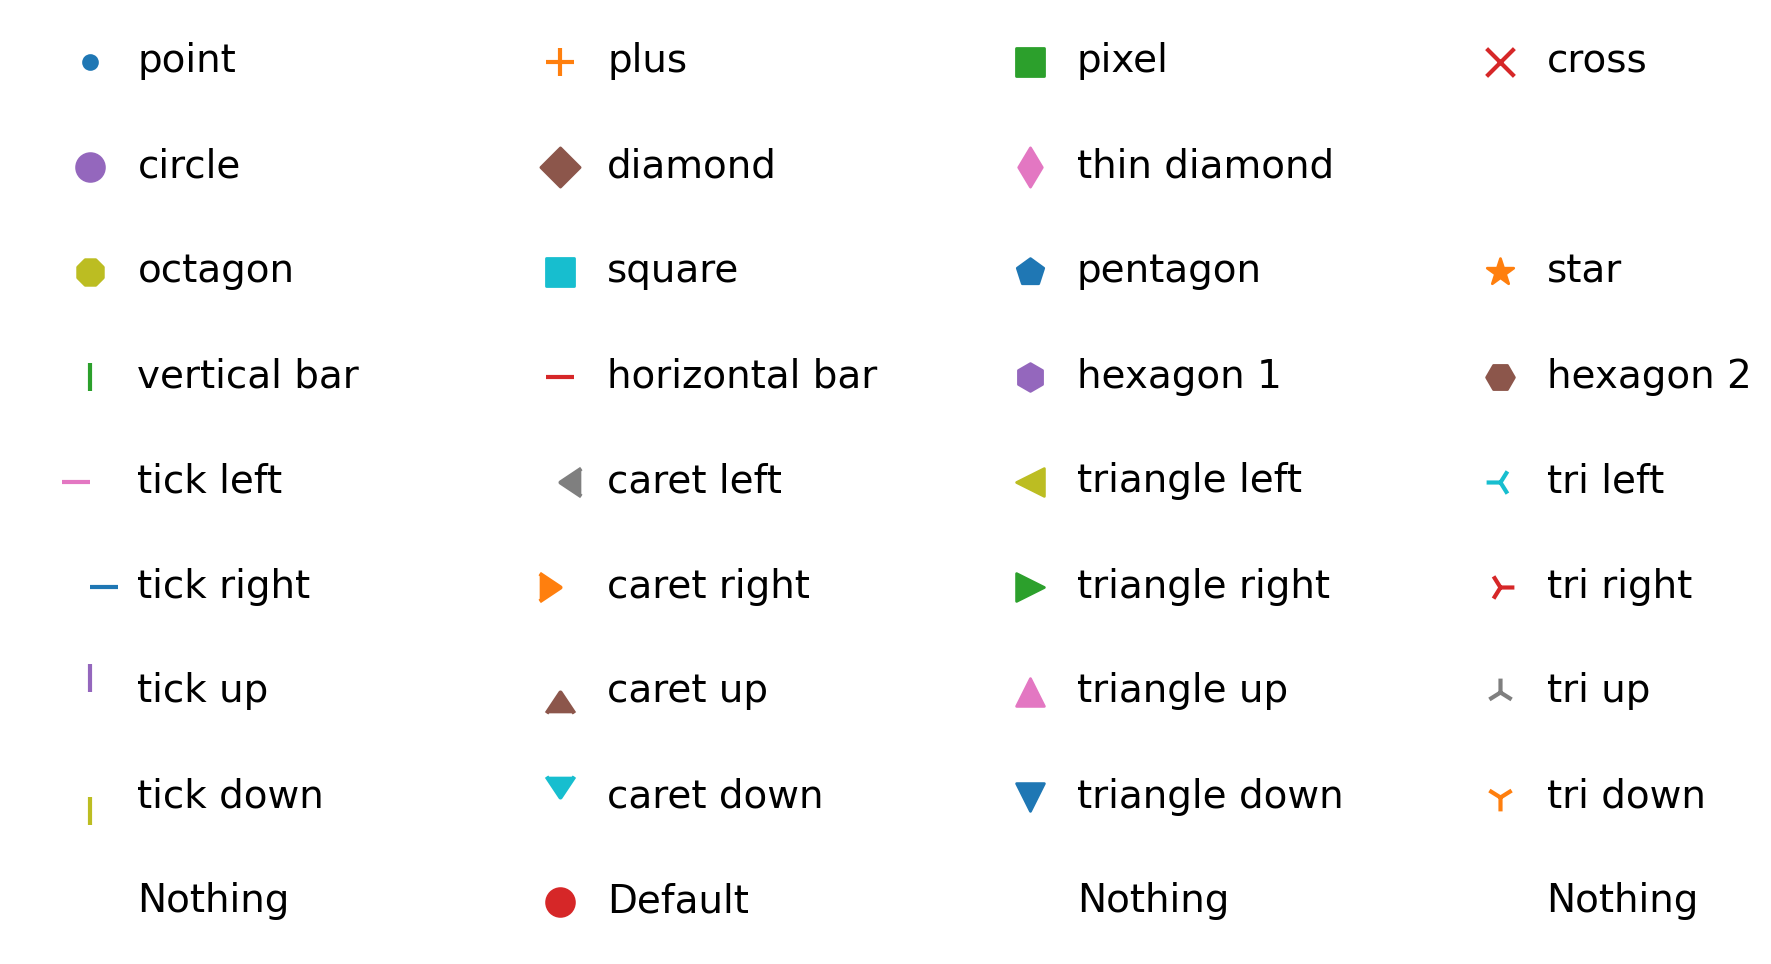

In [8]:
markers = [".", "+", ",", "x", "o", "D", "d", "", "8", "s", "p", "*", "|", "_", "h", "H", 0, 4, "<", "3",
           1, 5, ">", "4", 2, 6, "^", "2", 3, 7, "v", "1", "None", None, " ", ""]

descripts = ["point", "plus", "pixel", "cross", "circle", "diamond", "thin diamond", "",
             "octagon", "square", "pentagon", "star", "vertical bar", "horizontal bar", "hexagon 1", "hexagon 2",
             "tick left", "caret left", "triangle left", "tri left", "tick right", "caret right", "triangle right", "tri right",
             "tick up", "caret up", "triangle up", "tri up", "tick down", "caret down", "triangle down", "tri down", 
             "Nothing", "Default", "Nothing", "Nothing"]

num_rows = 4
num_cols = len(markers)//num_rows


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for i, marker in enumerate(markers):
    x = i%num_rows
    y = abs(i//num_rows-num_cols)
    ax.scatter(x, y, marker=marker, s=100)
    ax.text(x + 0.1, y - 0.1, descripts[i], size=14)    
    
ax.set_axis_off()

In [9]:
# Set the DPI for all figures
plt.rcParams['figure.dpi'] = 75

# Linestyles
Line styles are about as commonly used as colors. There are a few predefined linestyles available to use. Note that there are some advanced techniques to specify some custom line styles. 

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

Also, don't mix up ".-" (line with dot markers) and "-." (dash-dot line) when using the ``plot`` function!

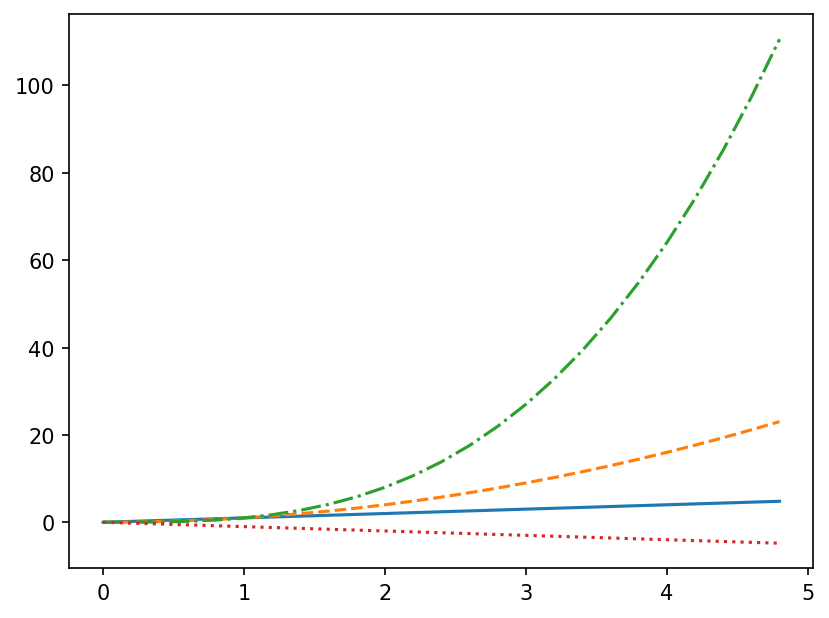

In [10]:
x = np.arange(0.0, 5.0, 0.2)

fig, ax = plt.subplots()
ax.plot(x, x, '-', x, x**2, '--', x, x**3, '-.', x, -x, ':')

It is a bit confusing, but the line styles mentioned above are only valid for lines. Whenever you are dealing with the linestyles of the edges of "Patch" objects, you will need to use words instead of the symbols. So "solid" instead of "-", and "dashdot" instead of "-.". This issue will be fixed for the v2.1 release and allow these specifications to be used interchangably.

<BarContainer object of 4 artists>

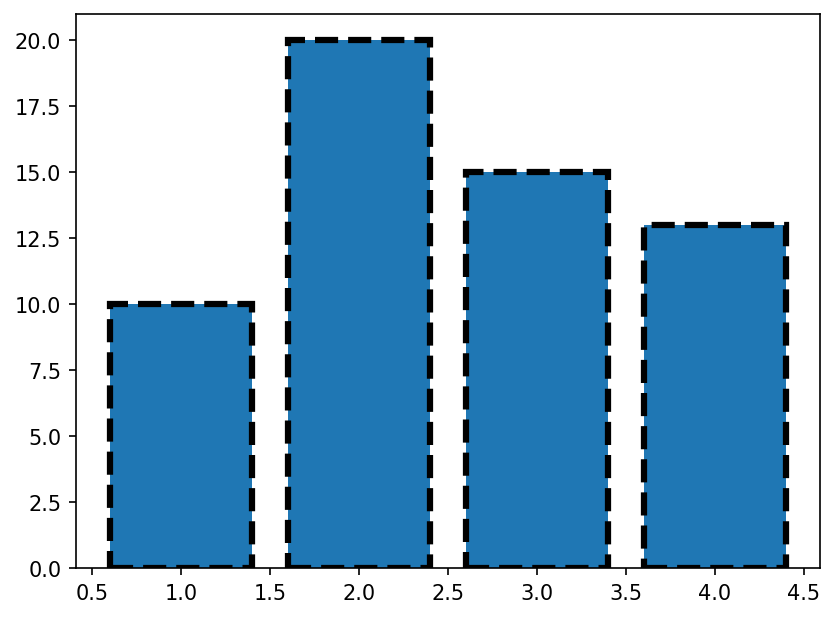

In [11]:
fig, ax = plt.subplots()
ax.bar([1, 2, 3, 4], [10, 20, 15, 13], ls='dashed', ec='black', lw=3)


# Plot attributes
With just about any plot you can make, there are many attributes that can be modified to make the lines and markers suit your needs. Note that for many plotting functions, Matplotlib will cycle the colors for each dataset you plot. However, you are free to explicitly state which colors you want used for which plots. For [`plt.plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot), you can mix the specification for the colors, linestyles, and markers in a single string.

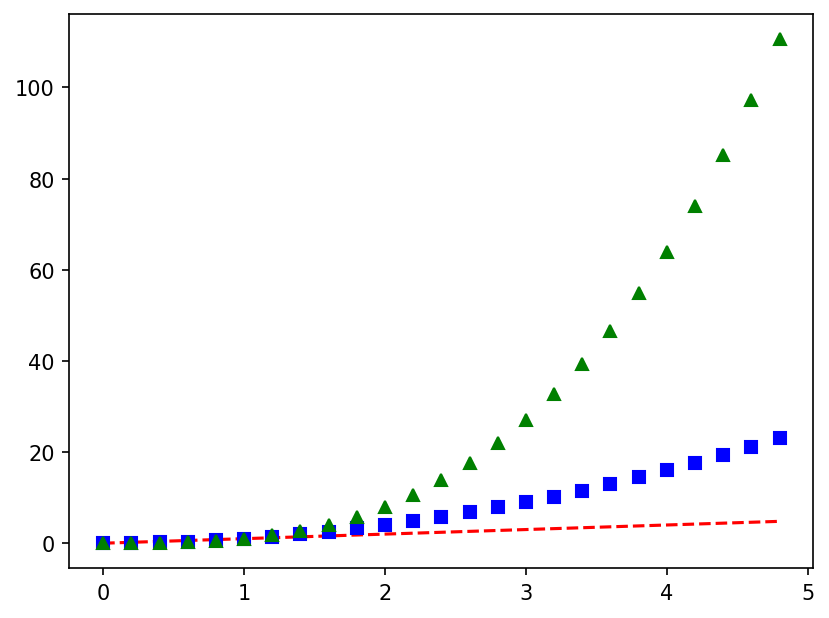

In [12]:
x = np.arange(0., 5., 0.2)
# red dashes, blue squares and green triangles

fig, ax = plt.subplots()

ax.plot(x, x, 'r--', x, x**2, 'bs', x, x**3, 'g^')


| Property               | Value Type                                      
|------------------------|-------------------------------------------------
|alpha                   | float                                           
|color or c              | any matplotlib color                            
|dash_capstyle           | ['butt', 'round' 'projecting']               
|dash_joinstyle          | ['miter' 'round' 'bevel']
|dashes                  | sequence of on/off ink in points                
|drawstyle               | [ ‘default’ ‘steps’ ‘steps-pre’
|                        |   ‘steps-mid’ ‘steps-post’ ]
|linestyle or ls         | [ '-' '--' '-.' ':' 'None' ' ' ''] 
|                        | and any drawstyle in combination with a         
|                        | linestyle, e.g. 'steps--'.                      
|linewidth or lw         | float value in points                           
|marker                  | [ 0 1 2 3 4 5 6 7 'o' 'd' 'D' 'h' 'H'
|                        |  '' 'None' ' ' `None` '8' 'p' ','
|                        |  '+' 'x' '.' 's' '\*' '\_' '&#124;'
|                        |  '1' '2' '3' '4' 'v' '<' '>' '^' ]
|markeredgecolor or mec  | any matplotlib color
|markeredgewidth or mew  | float value in points
|markerfacecolor or mfc  | any matplotlib color
|markersize or ms        | float
|solid_capstyle          | ['butt' 'round' 'projecting']
|solid_joinstyle         | ['miter' 'round' 'bevel']
|visible                 | [`True` `False`]
|zorder                  | any number

When colormaps are created in mpl, they get "registered" with a name. This allows one to specify a colormap to use by name.

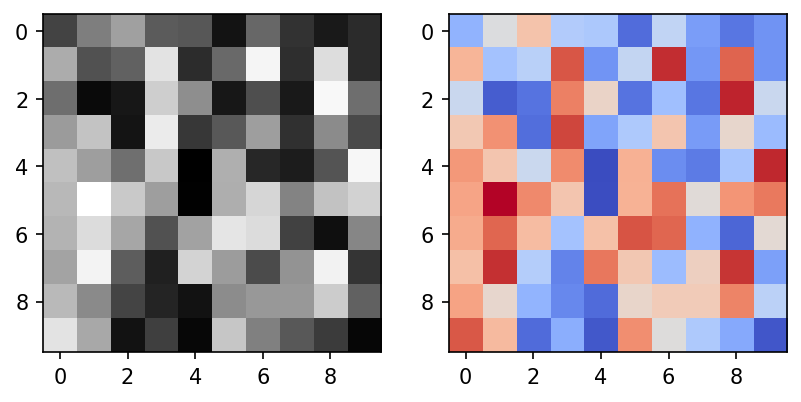

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)
z = np.random.random((10, 10))
ax1.imshow(z, interpolation='none', cmap='gray')
ax2.imshow(z, interpolation='none', cmap='coolwarm')


# Mathtext
Oftentimes, you just simply need that superscript or some other math text in your labels. Matplotlib provides a very easy way to do this for those familiar with LaTeX. Any text that is surrounded by dollar signs will be treated as "[mathtext](http://matplotlib.org/users/mathtext.html#mathtext-tutorial)". Do note that because backslashes are prevelent in LaTeX, it is often a good idea to prepend an `r` to your string literal so that Python will not treat the backslashes as escape characters.

Text(0.5, 1.0, '$\\sigma_i=15$')

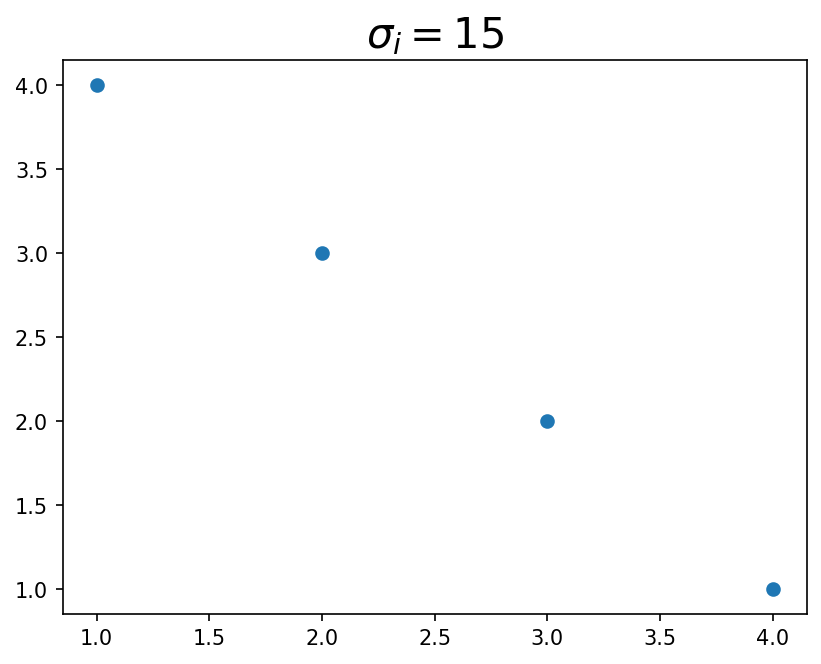

In [14]:
fig, ax = plt.subplots()

ax.scatter([1, 2, 3, 4], [4, 3, 2, 1])
ax.set_title(r'$\sigma_i=15$', fontsize=20)

# Transforms
The topic of transforms in Matplotlib, that is the ability to map the coordinates specified by your data to the coordinates of your figure, is very advanced and will not be covered in this tutorial. For those who are interested in learning about them, see the [transformation tutorial](https://matplotlib.org/stable/users/explain/artists/transforms_tutorial.html#transformations-tutorial). For those who are really daring, there are the developer guides to [transforms](https://matplotlib.org/stable/api/transformations.html#module-matplotlib.transforms) and [scales](https://matplotlib.org/stable/gallery/scales/index.html#scales). While most users will never, ever need to understand Matplotlib transforms to the level described in those links, it is important to be aware of them, and their critical role in figure-making.

In a figure, there are four coordinate systems: *display*, *figure*, *axes*, and *data*. Transforms are used to convert coordinates in one system into another system for various uses. This is how Matplotlib knows exactly where to place the ticks and ticklabels, even when you change the axis limits. The ticker says that the tick and label "1.5", for example, are to go at data x-coordinate 1.5. The transform says that location is at 0.4 in axes x-coordinate space. Meanwhile, the xlabel of "Distance" is placed at axes x-coordinate space of 0.5 (half-way). Meanwhile, a legend might be placed at a location relative to the figure coordinates.

Furthermore, the transform system is what is used to allow various scales to work, such as log scales. The transform system is what is used to make the polar plots work seamlessly. Whether you realize it or not, you use the transforms system in Matplotlib all the time. Everything drawn in Matplotlib has a transform associated with it. Most of the time, you will never notice this, and will happily operate within the *data* coordinate system. But when you want to do some more advanced plots, with some eye-catching visual tricks, the transform system will be there for you.

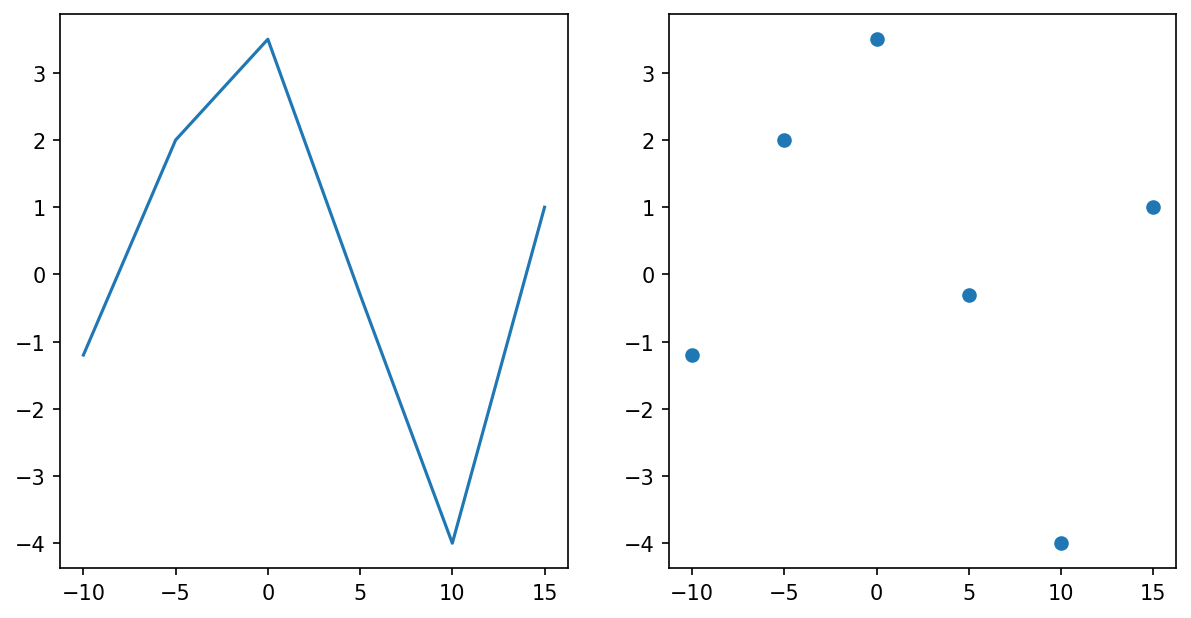

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(0.5))

ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

### `ax.margins(...)`

If you'd like to add a bit of "padding" to a plot, `ax.margins(<some_small_fraction>)` is a very handy way to do so.  Instead of choosing "even-ish" numbers as min/max ranges for each axis, `margins` will make Matplotlib calculate the min/max of each axis by taking the range of the data and adding on a fractional amount of padding.

As an example:

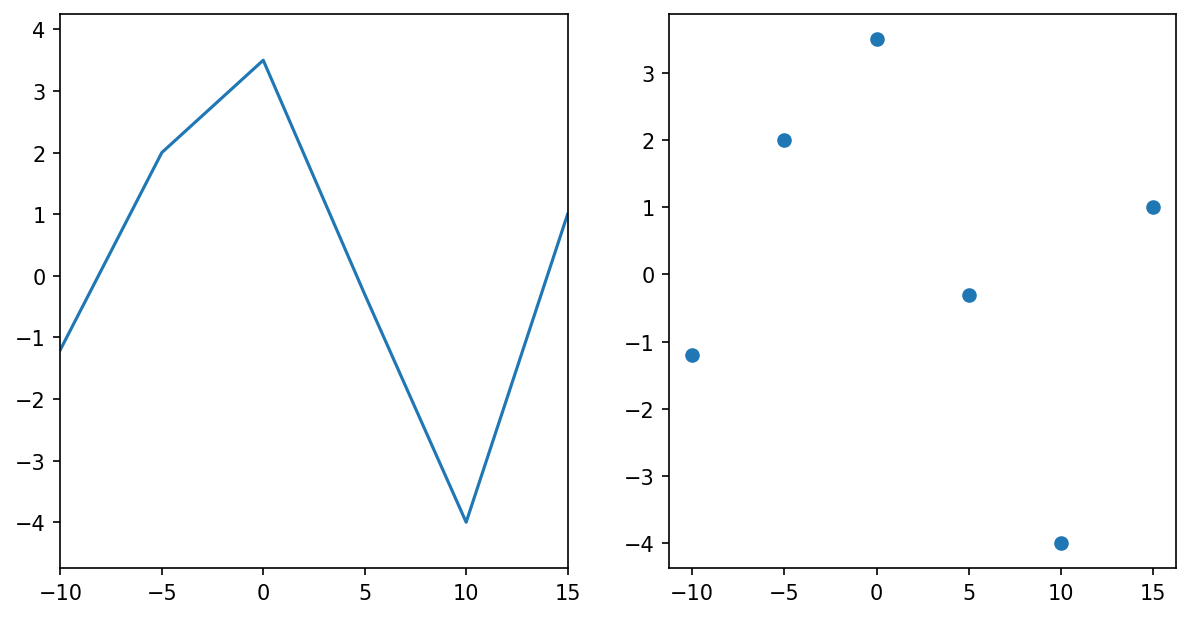

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))

ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

ax1.margins(x=0.0, y=0.1) # 10% padding in the y-direction only
ax2.margins(0.05) # 5% padding in all directions

### `ax.axis(...)`

The `ax.axis(...)` method is a convienent way of controlling the axes limits and enabling/disabling autoscaling.

If you ever need to get all of the current plot limits, calling `ax.axis()` with no arguments will return the xmin/max/etc:

    xmin, xmax, ymin, ymax = ax.axis()
    
If you'd like to manually set all of the x/y limits at once, you can use `ax.axis` for this, as well (note that we're calling it with a single argument that's a sequence, not 4 individual arguments):

    ax.axis([xmin, xmax, ymin, ymax])
    
However, you'll probably use `axis` mostly with either the `"tight"` or `"equal"` options. There are other options as well; see the documentation for full details.  In a nutshell, though:

  * *tight*: Set axes limits to the exact range of the data
  * *equal*: Set axes scales such that one cm/inch in the y-direction is the same as one cm/inch in the x-direction. In Matplotlib terms, this sets the aspect ratio of the plot to 1.  That _doesn't_ mean that the axes "box" will be square.
  
And as an example:

(-11.25, 16.25, -4.375, 3.875)

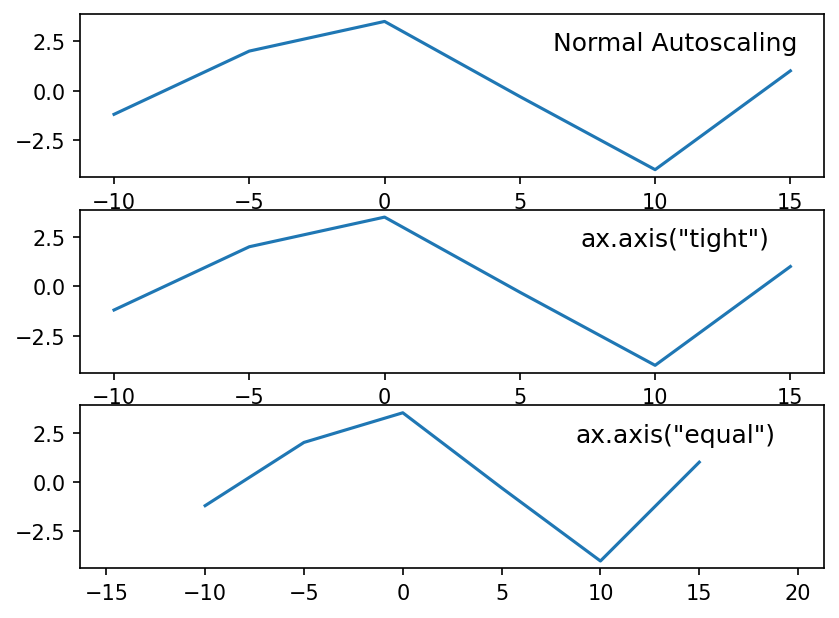

In [17]:
fig, axes = plt.subplots(nrows=3)

for ax in axes:
    ax.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

axes[0].set_title('Normal Autoscaling', y=0.7, x=0.8)

axes[1].set_title('ax.axis("tight")', y=0.7, x=0.8)
axes[1].axis('tight')

axes[2].set_title('ax.axis("equal")', y=0.7, x=0.8)
axes[2].axis('equal')

### Manually setting only one limit

Another trick with limits is to specify only half of a limit. When done **after** a plot is made, this has the effect of allowing the user to anchor a limit while letting Matplotlib autoscale the rest of it.

(-11.25, 25.0)

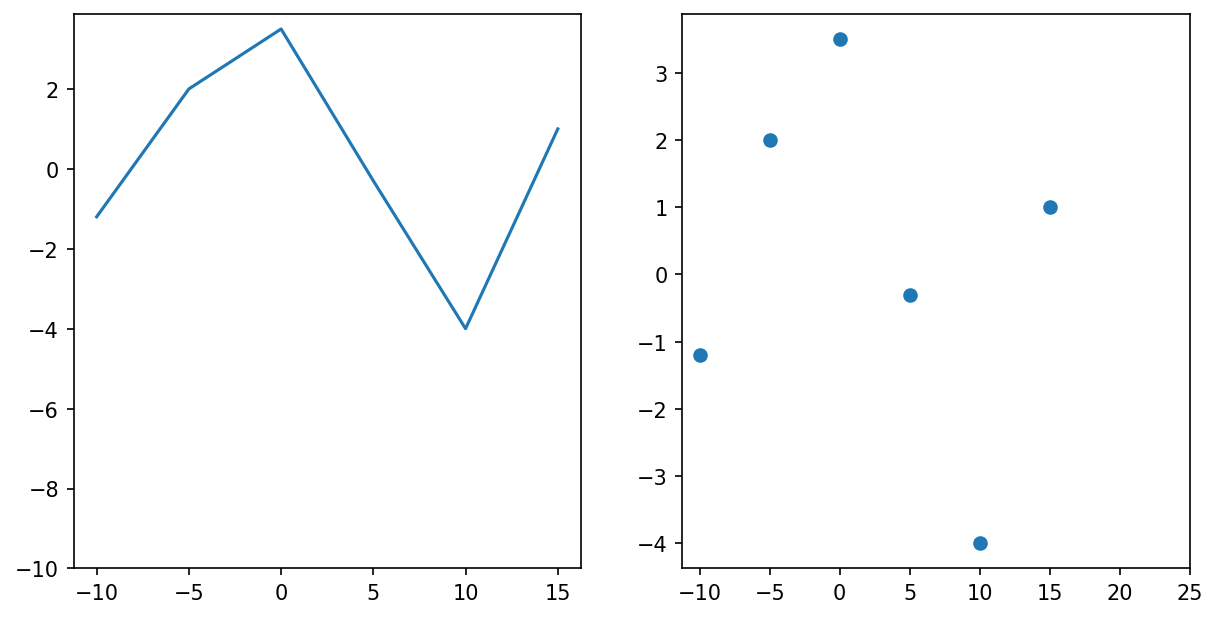

In [18]:
# Good -- setting limits after plotting is done
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax1.set_ylim(bottom=-10)
ax2.set_xlim(right=25)

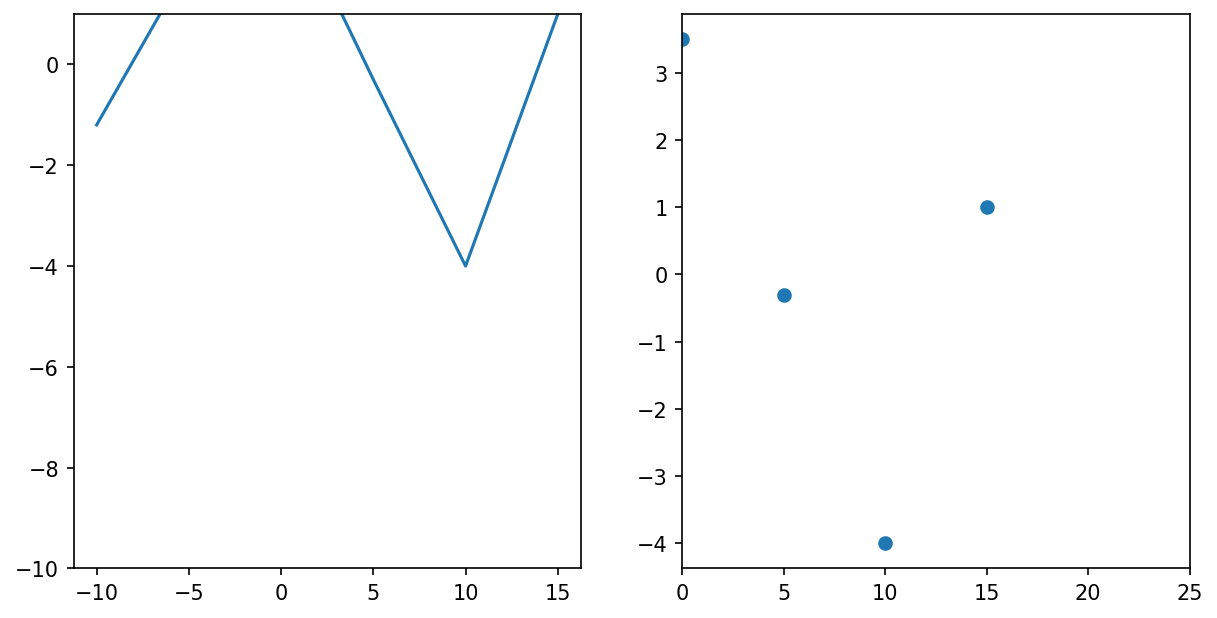

In [19]:
# Bad -- Setting limits before plotting is done
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax1.set_ylim(bottom=-10)
ax2.set_xlim(right=25)
ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

# Legends

As you've seen in some of the examples so far, the X and Y axis can also be labeled, as well as the subplot itself via the title. 

However, another thing you can label is the line/point/bar/etc that you plot.  You can provide a label to your plot, which allows your legend to automatically build itself. 

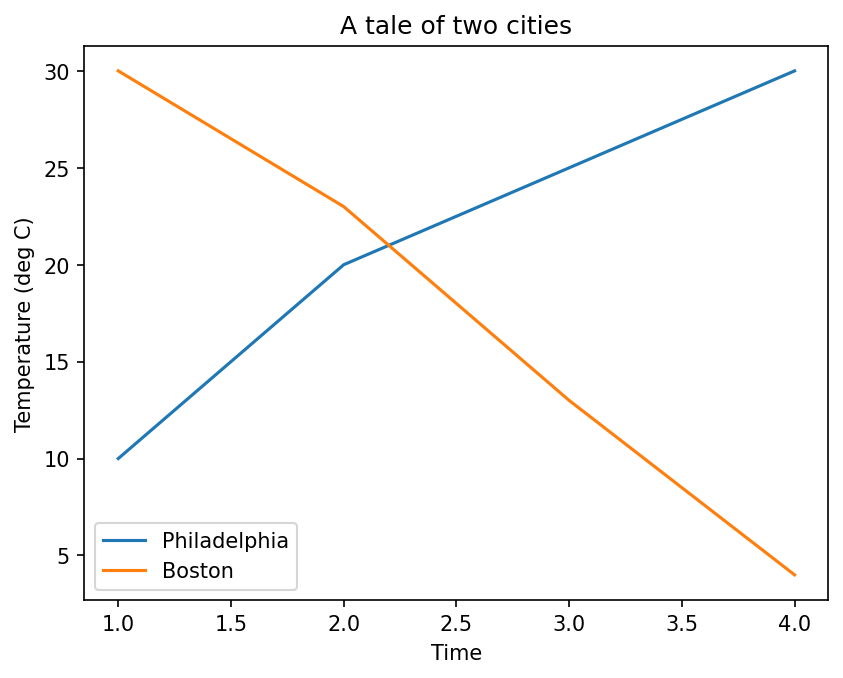

In [20]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Philadelphia')
ax.plot([1, 2, 3, 4], [30, 23, 13, 4], label='Boston')
ax.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
ax.legend()

In `classic` mode, legends will go in the upper right corner by default (you can control this with the `loc` kwarg). As of v2.0, by default Matplotlib will choose a location to avoid overlapping plot elements as much as possible. To force this option, you can pass in:

    ax.legend(loc="best")
    
Also, if you happen to be plotting something that you do not want to appear in the legend, just set the label to "\_nolegend\_".

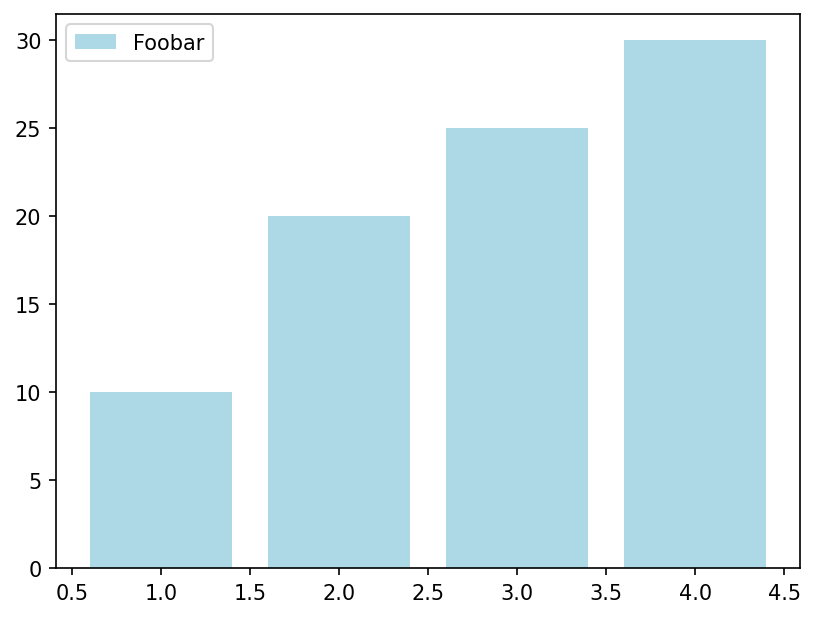

In [21]:
fig, ax = plt.subplots(1, 1)
ax.bar([1, 2, 3, 4], [10, 20, 25, 30], label="Foobar", align='center', color='lightblue')
ax.legend(loc='best')

### Controlling the legend entries

Calling :func:`legend` with no arguments automatically fetches the legend
handles and their associated labels. This functionality is equivalent to:

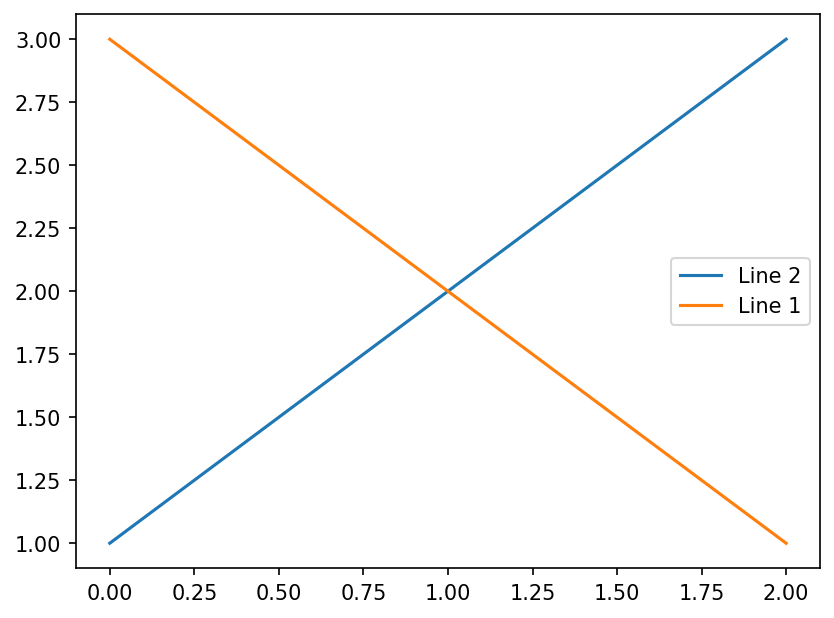

In [22]:
fig, ax = plt.subplots()

line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

The :meth:`matplotlib.axes.Axes.get_legend_handles_labels` function returns a list of handles/artists which exist on the Axes which can be used to generate entries for the resulting legend - it is worth noting however that not all artists can be added to a legend, at which point a "proxy" will have to be created (see `proxy_legend_handles` for further details).

For full control of what is being added to the legend, it is common to pass the appropriate handles directly to :func:`legend`

type:  <class 'matplotlib.lines.Line2D'>


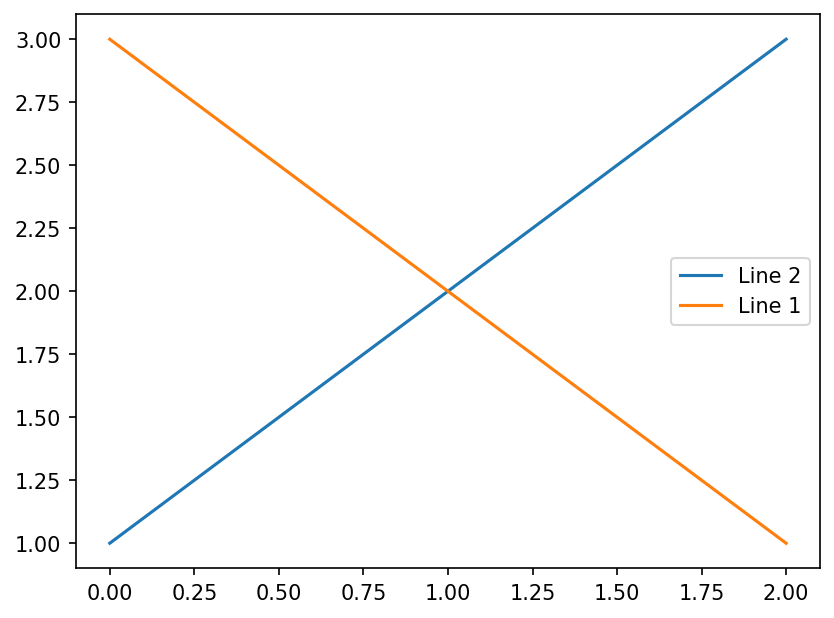

In [23]:
fig, ax = plt.subplots()

line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')

print('type: ', line_up.__class__)

ax.legend(handles=[line_up, line_down])

In some cases, it is not possible to set the label of the handle, so it is
possible to pass through the list of labels to `legend`:

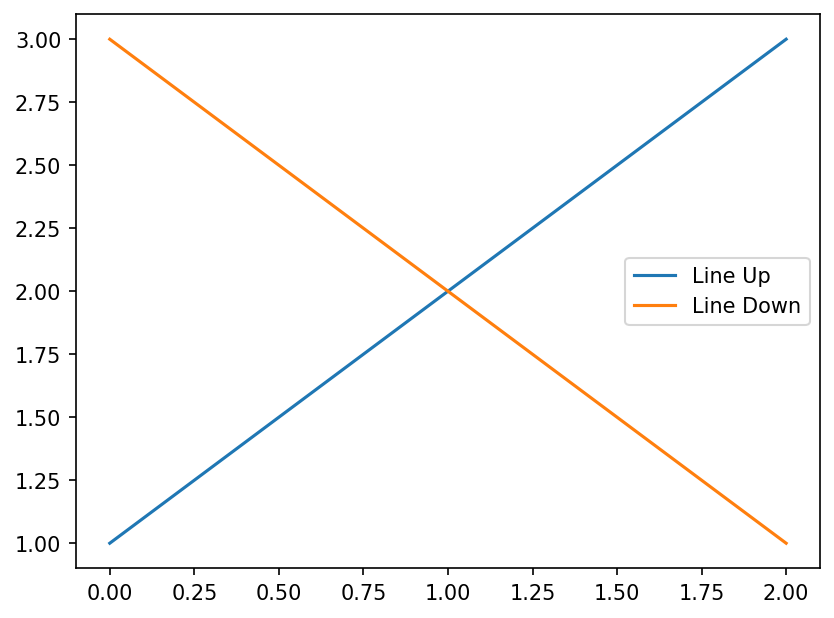

In [24]:
fig, ax = plt.subplots()

line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')

ax.legend(handles=[line_up, line_down], labels=['Line Up','Line Down'])

Legend location
===============

The location of the legend can be specified by the keyword argument
**loc**. Please see the documentation at :func:[legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html) for more details.

The ``bbox_to_anchor`` keyword gives a great degree of control for manual
legend placement. For example, if you want your axes legend located at the
figure's top right-hand corner instead of the axes' corner, simply specify
the corner's location, and the coordinate system of that location::

    plt.legend(bbox_to_anchor=(1, 1),
               bbox_transform=plt.gcf().transFigure)

More examples of custom legend placement:



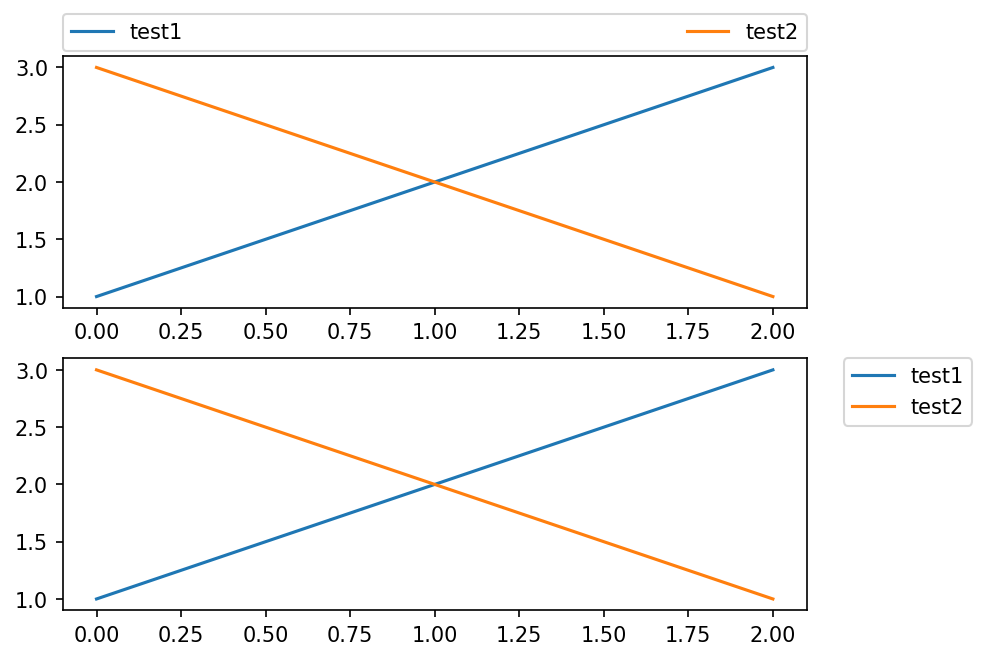

In [25]:
fig, axes = plt.subplots(nrows=2)
axes[0].plot([1, 2, 3], label="test1")
axes[0].plot([3, 2, 1], label="test2")

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
axes[0].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

axes[1].plot([1, 2, 3], label="test1")
axes[1].plot([3, 2, 1], label="test2")
# Place a legend to the right of this smaller subplot.
axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Multiple legends on the same Axes
=================================

Sometimes it is more clear to split legend entries across multiple
legends. Whilst the instinctive approach to doing this might be to call
the :func:`legend` function multiple times, you will find that only one
legend ever exists on the Axes. This has been done so that it is possible
to call :func:`legend` repeatedly to update the legend to the latest
handles on the Axes, so to persist old legend instances, we must add them
manually to the Axes:



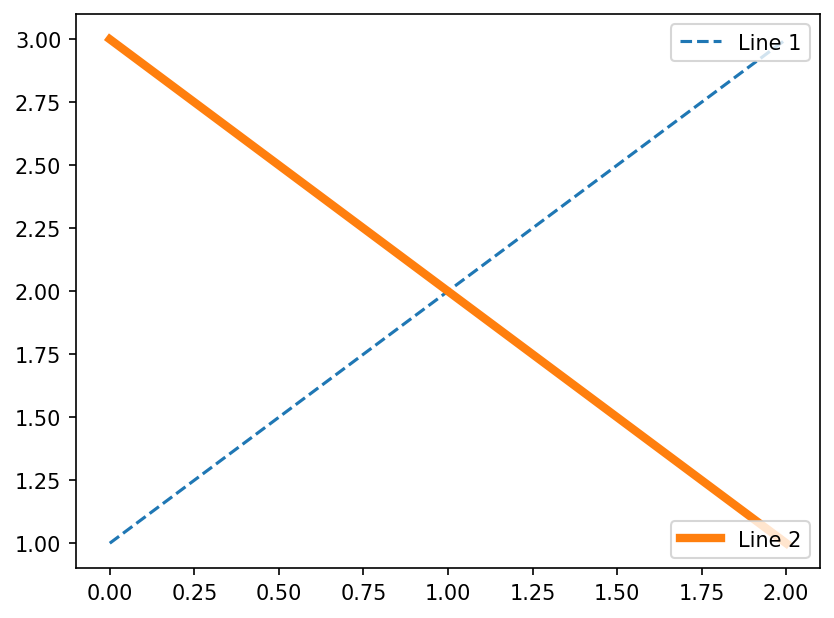

In [26]:
fig, ax = plt.subplots()

line1, = ax.plot([1, 2, 3], label="Line 1", linestyle='--')
line2, = ax.plot([3, 2, 1], label="Line 2", linewidth=4)

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc=1)

# Add the legend manually to the current Axes.
ax.add_artist(first_legend)
# Create another legend for the second line.
ax.legend(handles=[line2], loc=4)

# Dealing with the boundaries: Layout, ticks, spines, etc

One key thing we haven't talked about yet is all of the annotation on the outside of the axes, the borders of the axes, and how to adjust the amount of space around the axes.  We won't go over every detail, but this next section should give you a reasonable working knowledge of how to configure what happens around the edges of your axes.

## Ticks, Tick Lines, Tick Labels and Tickers
This is a constant source of confusion:

* A Tick is the *location* of a Tick Label.
* A Tick Line is the line that denotes the location of the tick.
* A Tick Label is the text that is displayed at that tick.
* A [`Ticker`](http://matplotlib.org/api/ticker_api.html#module-matplotlib.ticker) automatically determines the ticks for an Axis and formats the tick labels.

[`tick_params()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.tick_params) is often used to help configure your tickers.

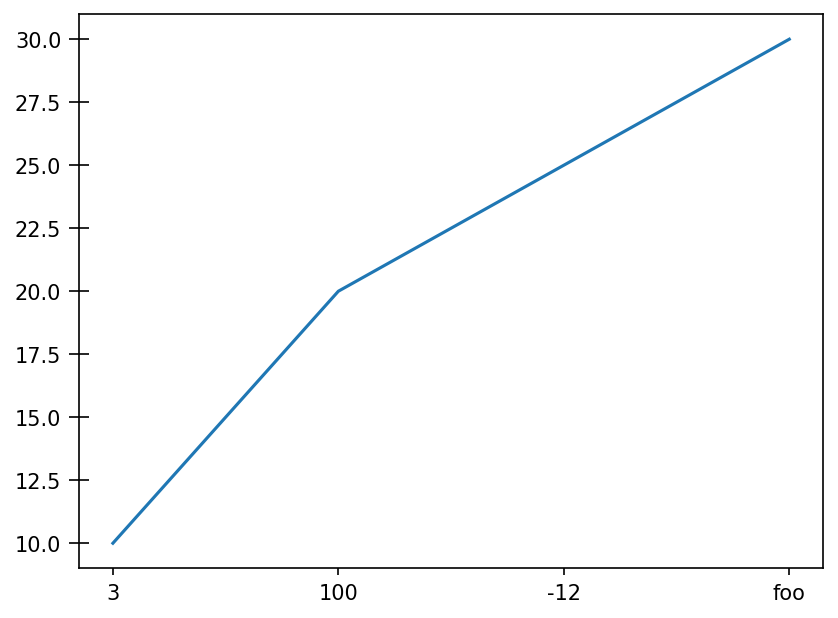

In [27]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])

# Manually set ticks and tick labels *on the x-axis* (note ax.xaxis.set, not ax.set!)
ax.xaxis.set(ticks=range(1, 5), ticklabels=[3, 100, -12, "foo"]) 

# Make the y-ticks a bit longer and go both in and out...
ax.tick_params(axis='y', direction='inout', length=10)

A commonly-asked question is "How do I plot non-numerical categories?"
    
Currently, the easiest way to do this is to "fake" the x-values and then change the tick labels to reflect the category.

For example:

[[<matplotlib.axis.XTick at 0x116f4e080>,
 [Text(0, 0, 'apples'), Text(1, 0, 'oranges'), Text(2, 0, 'peaches')]]

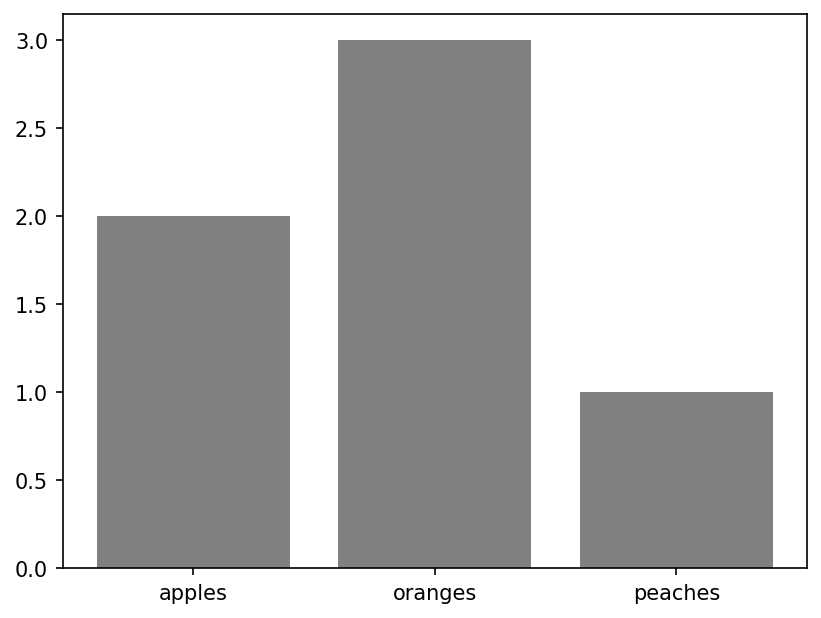

In [28]:
data = [('apples', 2), ('oranges', 3), ('peaches', 1)]
fruit, value = zip(*data)

fig, ax = plt.subplots()
x = np.arange(len(fruit))
ax.bar(x, value, align='center', color='gray')
ax.set(xticks=x, xticklabels=fruit)

## Subplot Spacing
The spacing between the subplots can be adjusted using [`fig.subplots_adjust()`](http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.subplots_adjust). Play around with the example below to see how the different arguments affect the spacing.

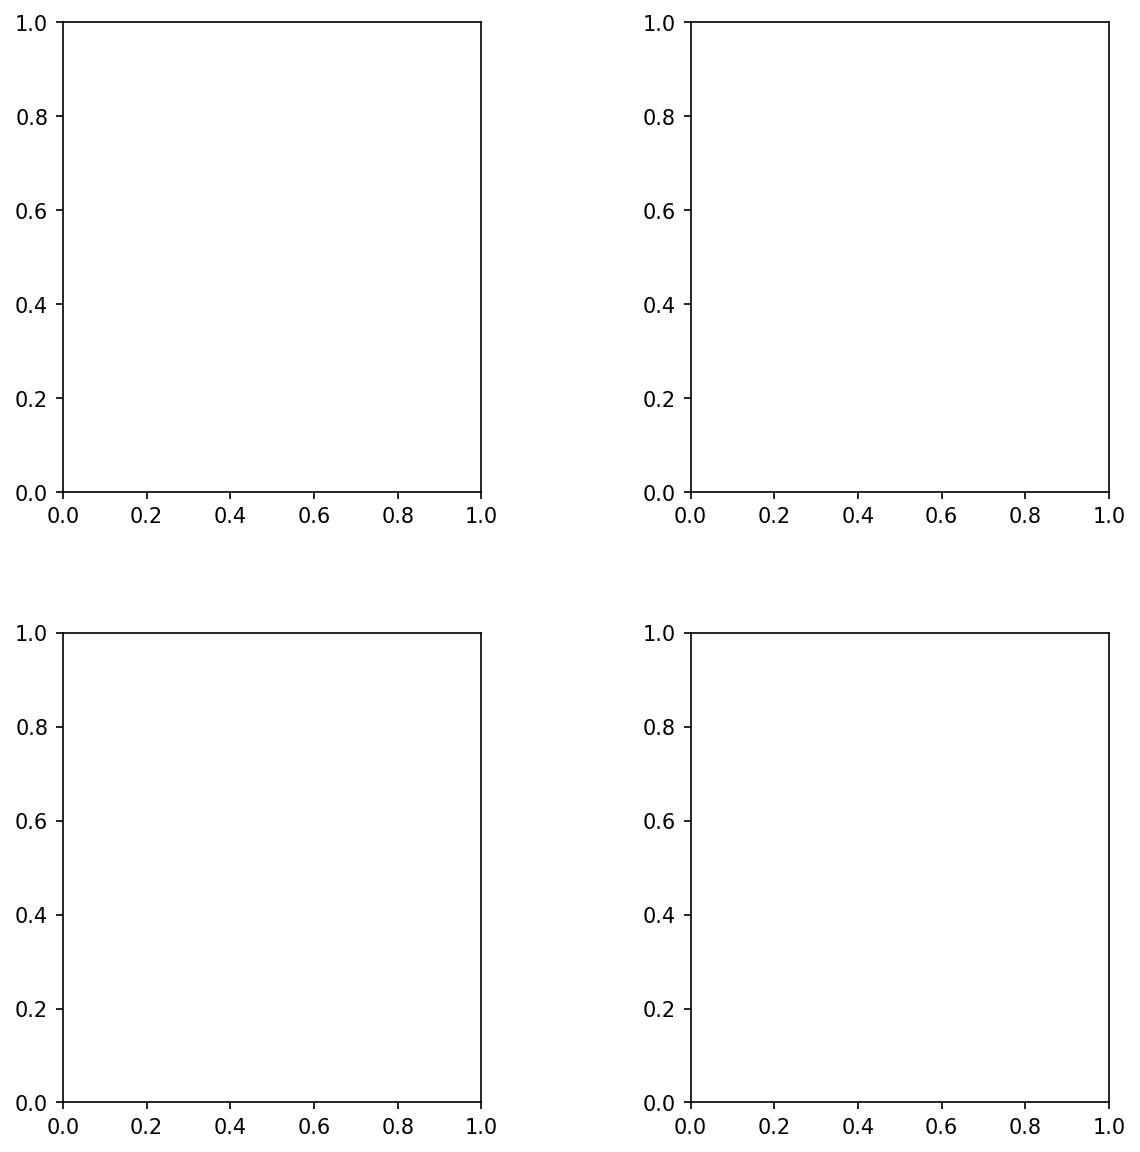

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))
fig.subplots_adjust(wspace=0.5, hspace=0.3,
                    left=0.125, right=0.9,
                    top=0.9,    bottom=0.1)

A common "gotcha" is that the labels are not automatically adjusted to avoid overlapping those of another subplot. Matplotlib does not currently have any sort of robust layout engine, as it is a design decision to minimize the amount of "magical plotting". We intend to let users have complete, 100% control over their plots. LaTeX users would be quite familiar with the amount of frustration that can occur with automatic placement of figures in their documents.

That said, there have been some efforts to develop tools that users can use to help address the most common compaints. The "[Tight Layout](http://matplotlib.org/users/tight_layout_guide.html)" feature, when invoked, will attempt to resize margins and subplots so that nothing overlaps.

If you have multiple subplots, and want to avoid overlapping titles/axis labels/etc, `fig.tight_layout` is a great way to do so:

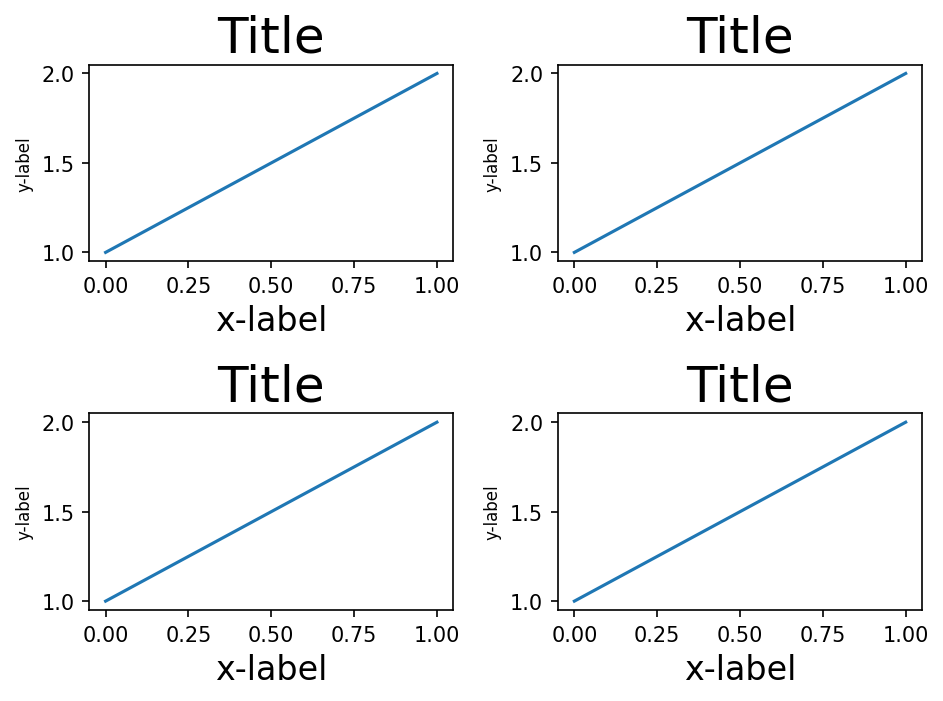

In [30]:
def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=16)
    ax.set_ylabel('y-label', fontsize=8)
    ax.set_title('Title', fontsize=24)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

# Enable fig.tight_layout to compare...
fig.tight_layout()

## GridSpec
Under the hood, Matplotlib utilizes [`GridSpec`](http://matplotlib.org/api/gridspec_api.html) to lay out the subplots. While `plt.subplots()` is fine for simple cases, sometimes you will need more advanced subplot layouts. In such cases, you should use GridSpec directly. GridSpec is outside the scope of this tutorial, but it is handy to know that it exists. [Here](http://matplotlib.org/users/gridspec.html) is a guide on how to use it.

## Sharing axes
There will be times when you want to have the x axis and/or the y axis of your subplots to be "shared". Sharing an axis means that the axis in one or more subplots will be tied together such that any change in one of the axis changes all of the other shared axes. This works very nicely with autoscaling arbitrary datasets that may have overlapping domains. Furthermore, when interacting with the plots (panning and zooming), all of the shared axes will pan and zoom automatically.

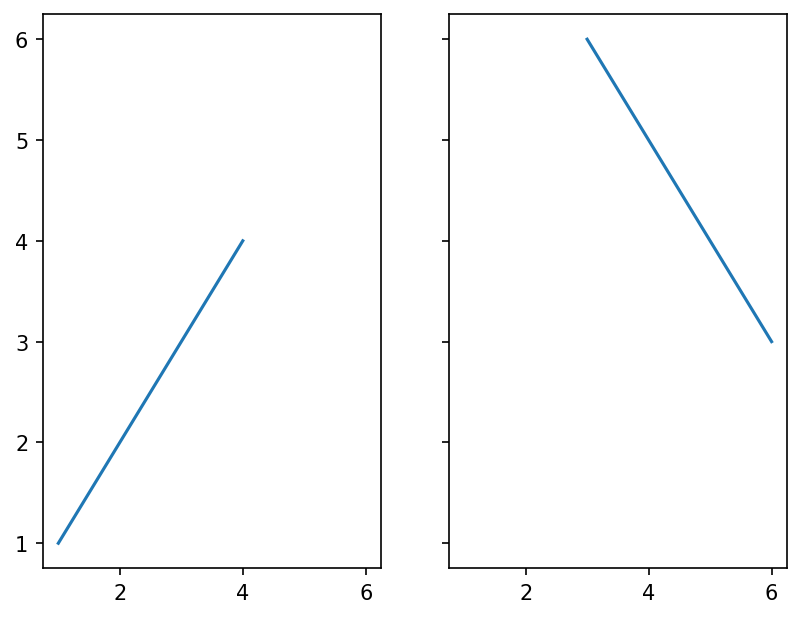

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.plot([1, 2, 3, 4], [1, 2, 3, 4])
ax2.plot([3, 4, 5, 6], [6, 5, 4, 3])

## "Twinning" axes
Sometimes one may want to overlay two plots on the same axes, but the scales may be entirely different. You can simply treat them as separate plots, but then twin them.

[Text(0, 0.5, 'Other scale')]

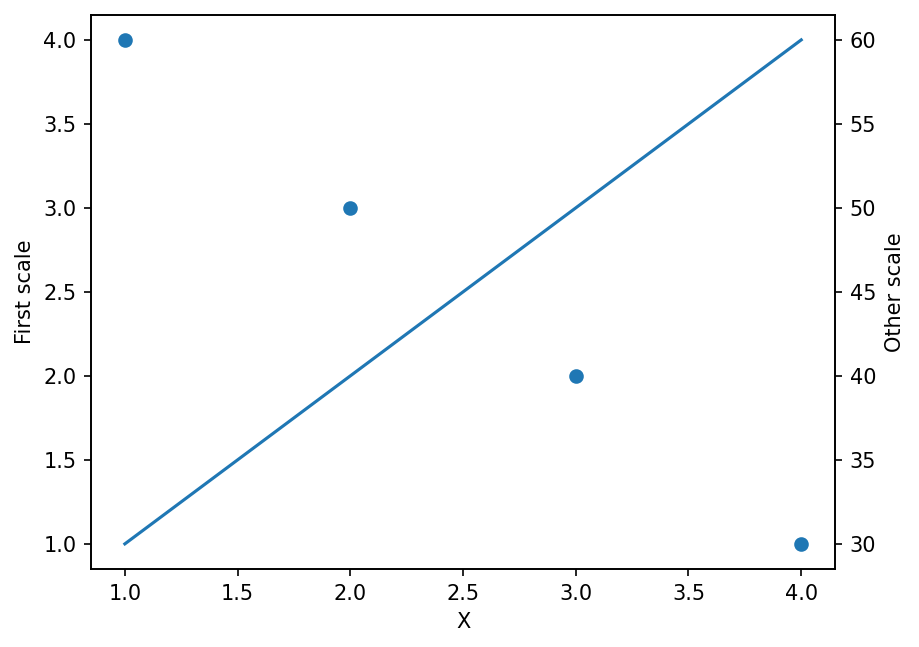

In [39]:
fig, ax1 = plt.subplots(1, 1)
ax1.plot([1, 2, 3, 4], [1, 2, 3, 4])
ax2 = ax1.twinx()
ax2.scatter([1, 2, 3, 4], [60, 50, 40, 30])
ax1.set(xlabel='X', ylabel='First scale')
ax2.set(ylabel='Other scale')

# Axis Spines
Spines are the axis lines for a plot. Each plot can have four spines: "top", "bottom", "left" and "right". By default, they are set so that they frame the plot, but they can be individually positioned and configured via the [`set_position()`](http://matplotlib.org/api/spines_api.html#matplotlib.spines.Spine.set_position) method of the spine. Here are some different configurations.

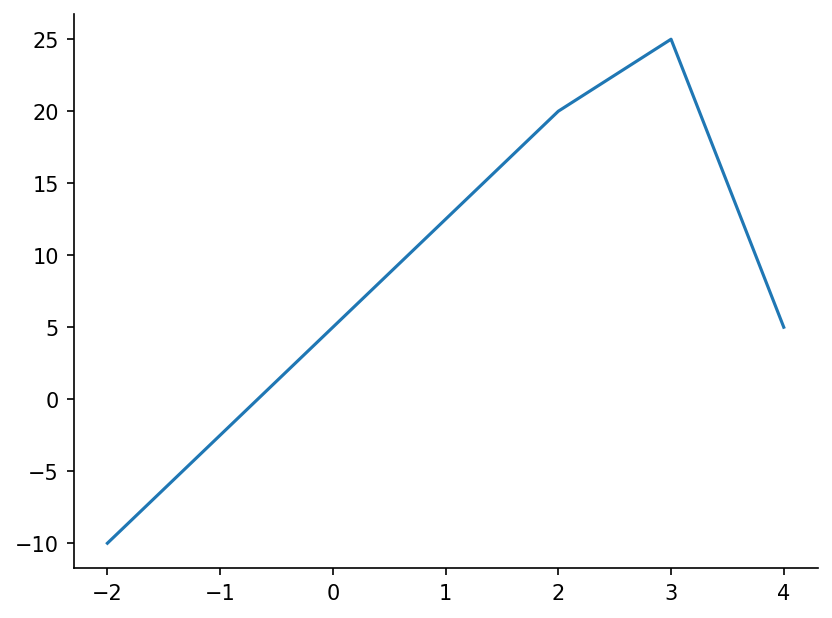

In [33]:
fig, ax = plt.subplots()
ax.plot([-2, 2, 3, 4], [-10, 20, 25, 5])
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')  # no ticklines at the top
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')  # no ticklines on the right

# "outward"
# Move the two remaining spines "out" away from the plot by 10 points
#ax.spines['bottom'].set_position(('outward', 10))
#ax.spines['left'].set_position(('outward', 10))

# "data"
# Have the spines stay intersected at (0,0)
#ax.spines['bottom'].set_position(('data', 0))
#ax.spines['left'].set_position(('data', 0))

# "axes"
# Have the two remaining spines placed at a fraction of the axes
#ax.spines['bottom'].set_position(('axes', 0.75))
#ax.spines['left'].set_position(('axes', 0.3))

## Drawing inset plots

### Drawing a basic inset plot

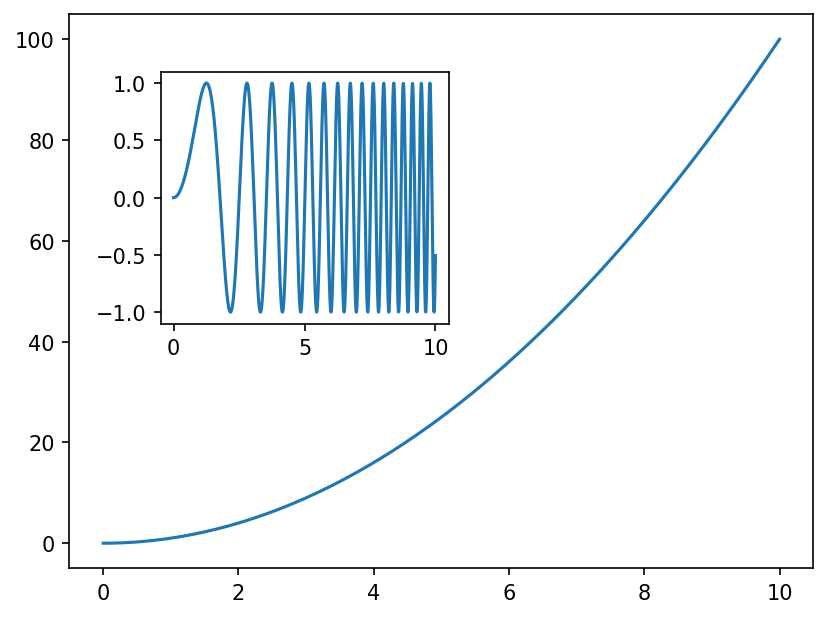

In [34]:
x = np.linspace(0,10,1000)
y2 = np.sin(x**2)
y1 = x**2

# Initiate a figure with subplot axes
fig, ax1 = plt.subplots()

# Set the inset plot dimensions
left, bottom, width, height = [0.22, 0.45, 0.3, 0.35]
ax2 = fig.add_axes([left, bottom, width, height])

# Draw the plots
ax1.plot(x,y1)
ax2.plot(x,y2)


# Annotations

## Adding text annotations

### Adding text and arrows with `axis.annotate`

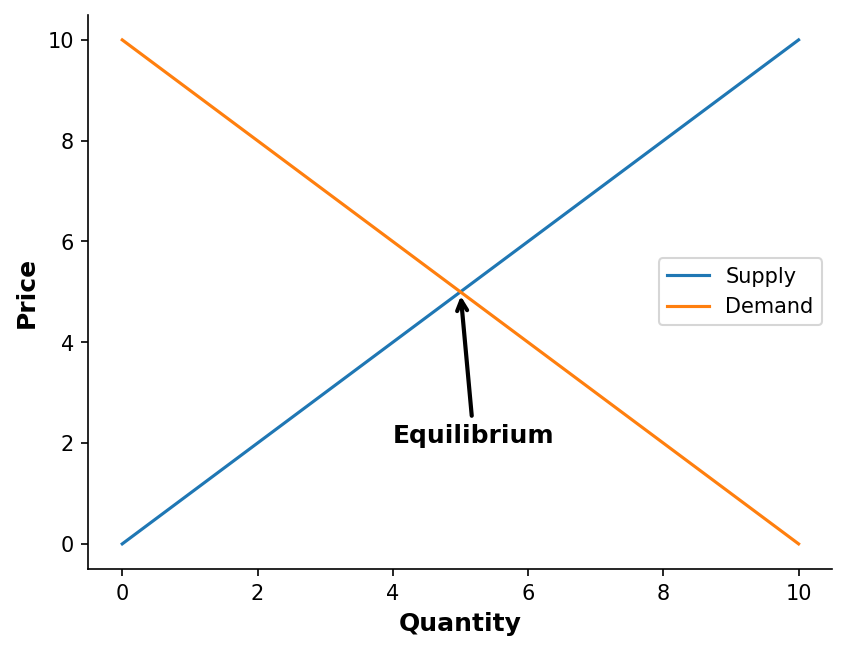

In [35]:
# create 1000 equally spaced points between -10 and 10
x = np.linspace(0, 10)

# Prepare the data
y1 = x
y2 = 10-x

# Plot the data
fig, ax = plt.subplots()
plt.plot(x,y1,label='Supply')
plt.plot(x,y2,label='Demand')

# Annotate the equilibrium point with arrow and text
ax.annotate("Equilibrium", xy=(5,5), xytext=(4,2), \
             fontsize=12, fontweight='semibold',\
             arrowprops=dict(linewidth=2, arrowstyle="->"))

# Label the axes
plt.xlabel('Quantity',fontsize=12,fontweight='semibold')
plt.ylabel('Price',fontsize=12,fontweight='semibold')

# Style the plot to a common demand-supply graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()

### Adding a text box with `axis.text`

Text(9, 1.5, 'Demand')

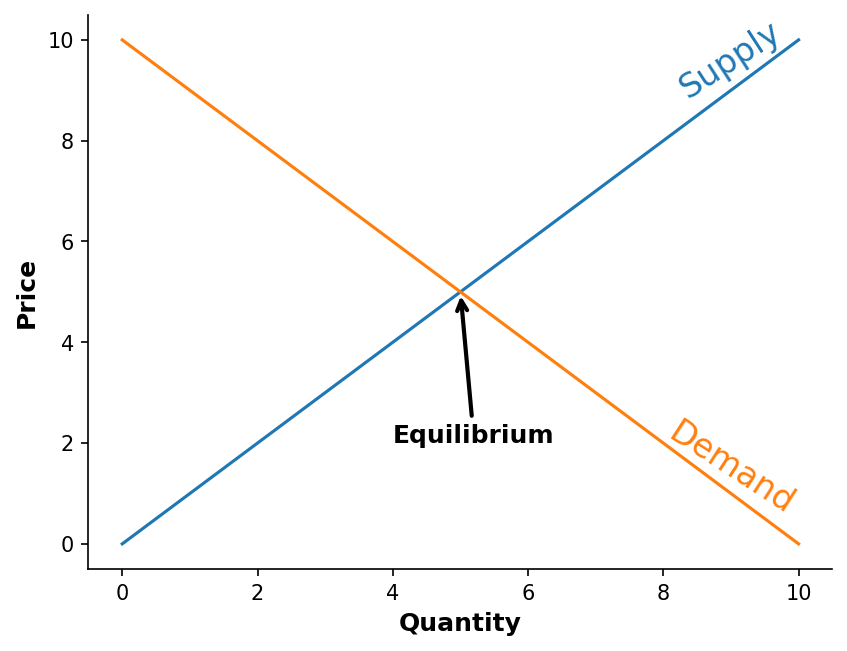

In [36]:
# create 1000 equally spaced points between -10 and 10
x = np.linspace(0, 10)

# Prepare the data
y1 = x
y2 = 10-x

# Plot the data
fig, ax = plt.subplots()
plt.plot(x,y1,label='Supply')
plt.plot(x,y2,label='Demand')

# Annotate the equilibrium point with arrow and text
ax.annotate("Equilibrium", xy=(5,5), xytext=(4,2), \
             fontsize=12, fontweight='semibold',\
             arrowprops=dict(linewidth=2, arrowstyle="->"))

# Label the axes
plt.xlabel('Quantity',fontsize=12,fontweight='semibold')
plt.ylabel('Price',fontsize=12,fontweight='semibold')

# Style the plot to a common demand-supply graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.text(9, 9.6, "Supply", ha="center", va="center", size=16, rotation=33,color='C0')
ax.text(9, 1.5, "Demand", ha="center", va="center", size=16, rotation=-33,color='C1')

### Adding arrows

Text(9, 1.5, 'Demand')

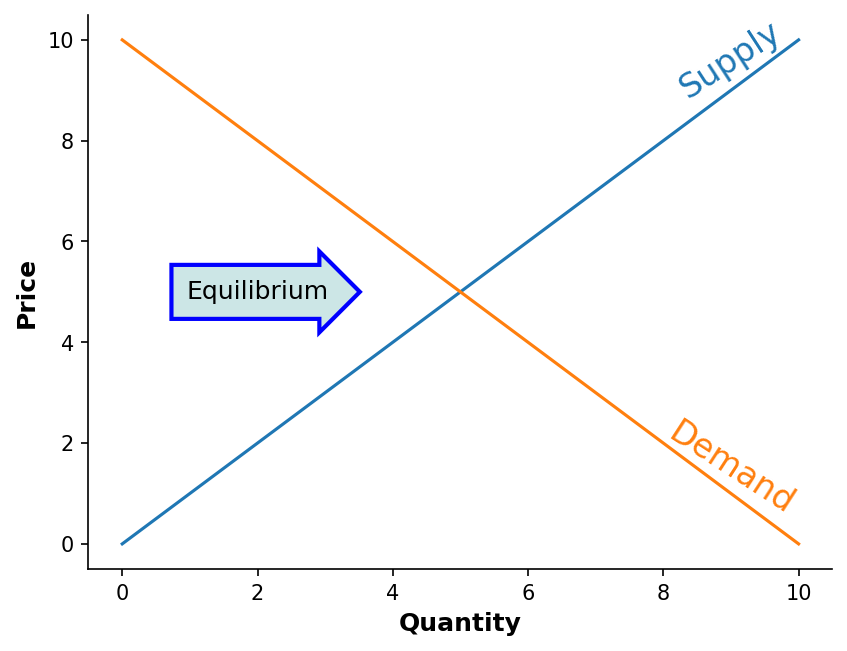

In [37]:
# create 1000 equally spaced points between -10 and 10
x = np.linspace(0, 10)

# Prepare the data
y1 = x
y2 = 10-x

# Plot the data
fig, ax = plt.subplots()
plt.plot(x,y1,label='Supply')
plt.plot(x,y2,label='Demand')

# Annotate the equilibrium point with arrow and text
bbox_props = dict(boxstyle="rarrow", fc=(0.8, 0.9, 0.9), ec="b", lw=2)
t = ax.text(2,5, "Equilibrium", ha="center", va="center", rotation=0,
            size=12,bbox=bbox_props)
bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

# Label the axes
plt.xlabel('Quantity',fontsize=12,fontweight='semibold')
plt.ylabel('Price',fontsize=12,fontweight='semibold')

# Style the plot to a common demand-supply graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.text(9, 9.6, "Supply", ha="center", va="center", size=16, rotation=33,color='C0')
ax.text(9, 1.5, "Demand", ha="center", va="center", size=16, rotation=-33,color='C1')